# Loading the required Library

In [1]:
# libraries for dataframe
import pandas as pd
import numpy as np
from datetime import datetime

# libraries for visulisation
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px
%matplotlib inline
sns.set_style('darkgrid')
sns.set_palette('Set2')


# libraries for machine learning preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import RandomizedSearchCV

# Libraries for Classifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.linear_model import LogisticRegression
 
# Libraries for evaluation metrics
from sklearn.metrics import roc_auc_score
from sklearn import metrics

# libraries for explanability
from shapash.explainer.smart_explainer import SmartExplainer
import shap

# library to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# resetting the column-rows defult display option
pd.options.display.max_columns = 200
pd.options.display.max_rows = 500

In [2]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [3]:
# function for execution timer
start_time_process = timer(None)

# Individual Dataset

In [32]:
# reading the individual cas file
individual_df=pd.read_csv('individual_df.csv').iloc[:,1:]

In [33]:
# top 5 rows of the dataset
individual_df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,title,zip_code,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,debt_settlement_flag,target,avg_fico_range,avg_last_fico_range
0,3600.0,0,13.99,123.03,2,13,347793,1,1,55000.0,0,122015,2,16292,19,38,5.91,82003,1.0,7.0,2765.0,29.7,13.0,1,4421.723917,3600.0,821.72,12019,122.67,32019,144904.0,9300.0,4.0,20701.0,1506.0,37.2,148.0,128.0,3.0,3.0,1.0,4.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,3.0,80.0,0.0,178050.0,7746.00,2400.0,13734.0,0,0,0,677.0,562.0
1,24700.0,0,11.99,820.28,2,10,101571,1,1,65000.0,0,122015,11,5131,57,41,16.06,121999,2.0,22.0,21470.0,19.2,38.0,1,25679.660000,24700.0,979.66,62016,926.35,32019,204396.0,73300.0,4.0,9733.0,25464.0,27.1,113.0,192.0,2.0,2.0,4.0,2.0,0.0,0.0,5.0,5.0,10.0,17.0,6.0,17.0,27.0,5.0,22.0,2.0,97.4,7.7,314017.0,39475.00,54400.0,24667.0,0,0,0,717.0,697.0
2,10400.0,1,22.45,289.91,5,25,66879,3,1,104433.0,1,122015,6,30411,17,38,25.37,61998,2.0,12.0,21929.0,64.5,35.0,1,11740.500000,10400.0,1340.50,72016,10128.96,32018,331730.0,34000.0,10.0,27644.0,4567.0,77.5,128.0,210.0,4.0,4.0,6.0,4.0,1.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,4.0,96.6,60.0,439570.0,95768.00,20300.0,88097.0,0,0,0,697.0,702.0
3,11950.0,0,13.44,405.18,2,12,312651,4,4,34000.0,1,122015,2,16292,30,10,10.20,101987,0.0,5.0,8822.0,68.4,6.0,1,13708.948530,11950.0,1758.95,52017,7653.56,52017,12798.0,12900.0,0.0,2560.0,844.0,91.0,193.0,54.0,29.0,20.0,0.0,36.0,7.0,0.0,2.0,3.0,2.0,2.0,2.0,4.0,4.0,3.0,5.0,0.0,100.0,100.0,16900.0,12798.00,9400.0,4000.0,0,0,0,692.0,757.0
4,20000.0,0,9.17,637.58,1,6,313535,1,1,156000.0,0,122015,2,16292,55,23,14.67,61990,0.0,12.0,40281.0,84.5,27.0,0,21393.800000,20000.0,1393.80,112016,15681.05,32019,360358.0,73300.0,6.0,30030.0,0.0,100.8,142.0,306.0,10.0,10.0,4.0,12.0,10.0,0.0,4.0,6.0,4.0,5.0,7.0,9.0,16.0,6.0,12.0,2.0,96.3,100.0,388852.0,113989.99,31500.0,46452.0,0,0,0,682.0,652.0


In [34]:
# spliting the target feature
individual_X=individual_df.drop('target',axis=1)
individual_y=individual_df['target']

In [35]:
print('shape of X: ',individual_X.shape)
print('shape of y: ',individual_y.shape)

shape of X:  (1319544, 64)
shape of y:  (1319544,)


## preprocessing

In [36]:
# splitting the train and test dataset
individual_X_train, individual_X_test, individual_y_train, individual_y_test = train_test_split(
    individual_X, individual_y, test_size=0.3, random_state=44)

In [37]:
# selecting only numerical feature for scaling purpose
cat_var_ind=pd.Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length','home_ownership', 'verification_status', 
                      'issue_d', 'purpose', 'title', 'addr_state', 'earliest_cr_line', 'initial_list_status',
                      'last_pymnt_d', 'last_credit_pull_d', 'disbursement_method','debt_settlement_flag'])
num_var_ind=individual_X_train.columns
num_var_ind=num_var_ind.drop(cat_var_ind)
len(num_var_ind)

47

In [38]:
# scaling the individual train dataset
scaler = StandardScaler()
individual_X_train[num_var_ind]=scaler.fit_transform(individual_X_train[num_var_ind])
individual_X_train.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,title,zip_code,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,debt_settlement_flag,avg_fico_range,avg_last_fico_range
464781,-0.967621,0,-0.255010,-0.946137,2,10,147770,1,1,-0.771487,1,52016,4,25120,0.698969,36,1.378723,42002,1.901043,1.132705,-1.184902,-1.744217,0.800026,1,-0.769591,-0.699443,-0.635912,32019,-0.830856,32019,-0.800328,-0.809256,0.479344,-0.879460,-0.214830,-1.968826,0.392568,-0.118581,0.695153,-0.581419,0.732861,-0.168845,-0.895237,-0.571356,0.188991,0.145468,-0.257255,0.506678,0.506122,1.010705,0.791182,0.159576,1.142810,-0.069896,-1.190199,-1.286757,-0.734542,-0.403986,-0.858396,0.321917,0,0,-0.348434,-1.590687
279048,-0.734850,0,-0.354715,-0.681046,1,9,248663,2,4,-1.065252,0,42015,1,12817,-1.282817,34,-1.112596,11983,-0.784949,-0.697518,-0.646081,-0.543629,-0.336279,1,-0.997280,-0.967343,-0.591249,112016,-0.793155,52017,0.990408,-0.567485,-0.918260,1.782886,-0.496963,-1.365783,0.061236,2.325103,1.268164,2.405454,1.816354,2.144277,2.376722,0.925841,-0.806546,0.145468,-1.086762,-0.471807,-1.423775,-0.285877,0.225568,0.159576,-0.726054,-1.322555,-2.132147,-1.286757,0.764746,-1.235848,-0.956797,-1.264103,0,0,-0.008560,-1.714835
1127189,-0.502079,0,-0.226832,-0.399066,1,7,291339,1,4,-1.102973,2,112012,2,20597,1.338255,4,0.054758,91985,-0.784949,0.115914,0.226604,0.218520,0.100761,0,-0.269594,-0.242130,-0.097142,122015,-0.781550,42018,-0.928000,-0.022213,-1.267661,-0.952421,-0.330287,0.345261,0.061236,1.803151,-0.565473,-0.208060,0.732861,-0.804954,2.376722,0.925841,2.677834,1.885760,2.231266,2.219027,-1.423775,1.010705,1.215392,1.921145,0.104553,-0.696225,0.184119,0.294733,-0.972733,-0.925499,-0.130225,-1.264103,0,0,-0.178497,0.147379
344715,0.079848,0,-0.374222,0.262945,1,8,179652,1,1,-0.674327,1,12015,2,16292,-0.196031,35,1.890720,71989,0.558047,-0.494160,-0.650737,1.169156,-0.248871,0,0.314423,0.329511,0.349933,22018,-0.754276,32019,0.629616,-1.071604,0.479344,1.278035,-0.844195,0.861117,0.463568,1.506588,-0.680075,-0.581419,2.358100,-0.804954,-0.125365,-0.571356,-0.308777,-0.550649,-0.672008,-0.961049,-0.020213,-0.804509,-0.905659,-0.545051,-0.518402,0.556434,0.801790,1.557649,0.489730,-0.536645,-0.786235,-0.140085,0,0,-1.198120,0.023231
904403,2.058401,1,2.075059,1.915349,6,30,304831,1,4,1.011680,2,112011,2,14853,0.443255,24,-1.513761,61995,-0.784949,-1.510951,0.371854,1.455986,-0.336279,0,2.523411,2.273091,2.231550,42013,2.387942,72015,0.054254,0.157109,0.129943,0.103371,0.247122,0.000146,0.061236,0.023769,0.236743,0.165300,0.191114,0.235951,0.067104,0.925841,0.188991,0.145468,0.157499,0.017436,0.155232,-0.026560,0.084164,0.159576,0.104553,-0.069896,-0.124717,-0.006774,0.054842,0.138921,0.115122,0.101918,0,0,-0.858246,0.457748


In [39]:
# scaling the individual test dataset

individual_X_test[num_var_ind]=scaler.transform(individual_X_test[num_var_ind])
individual_X_test.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,title,zip_code,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,debt_settlement_flag,avg_fico_range,avg_last_fico_range
344869,1.592859,0,-1.338762,1.780528,0,2,362600,8,1,0.783069,1,12015,1,12817,1.306290,4,-0.647582,71985,-0.784949,0.522630,1.239061,-0.228116,1.324474,1,1.647903,1.815778,0.490489,82017,0.026586,32019,1.398763,1.567305,-0.918260,1.030325,2.125758,-0.344969,-0.625095,0.415233,0.122141,0.912018,2.358100,0.409436,2.376722,0.925841,1.184528,0.145468,2.231266,2.219027,-0.721994,0.751388,1.922409,0.159576,0.519856,-0.696225,0.415745,-0.655299,1.432866,0.033697,2.264210,-0.065059,0,0,0.501252,1.699223
1300957,1.243703,1,2.562748,1.552001,5,27,292057,1,1,-0.274258,2,112016,2,16292,-0.867281,45,0.783601,121996,0.558047,0.929346,-0.782931,-0.605092,0.974842,1,2.169538,1.472794,2.231550,62018,2.387942,32019,-0.602824,-0.737239,1.876947,-0.767350,-0.943685,0.897445,1.646898,-0.569358,-0.794677,-0.768098,-0.892378,-0.920610,-0.702769,-0.571356,-0.806546,0.145468,-1.086762,-1.205670,2.260574,1.010705,-0.198642,0.159576,0.935159,1.809092,-0.062949,1.557649,-0.627258,0.402778,-1.101119,0.766408,0,0,0.161377,0.209452
1217813,-0.618464,0,-1.208712,-0.613820,0,2,4677,4,1,-0.302834,0,72016,6,30411,0.826826,43,0.355933,12003,-0.784949,-0.494160,-0.976932,-1.662265,-0.685911,1,-0.475869,-0.356458,-0.680843,52018,-0.153981,122018,-0.599517,0.101245,-0.918260,-0.226553,2.125758,-1.761757,-2.234423,-0.201619,2.070380,-0.954778,-0.892378,1.276856,-0.895237,-0.571356,-0.806546,-1.246766,-0.257255,0.017436,-0.897439,-0.285877,-0.057239,-1.249679,-0.518402,-0.696225,0.801790,-1.286757,-0.528567,0.416284,0.735707,0.686662,0,0,2.540498,1.699223
467206,-0.734850,0,0.280364,-0.634767,2,13,200368,8,4,-0.588598,2,52016,10,22995,-1.059067,38,-1.123438,62003,1.901043,-1.307593,-1.133685,-1.076313,-1.122952,1,-1.081318,-1.076229,-0.542788,82017,-0.742180,22019,1.053620,-1.153909,-1.267661,2.387746,-0.334955,-1.249533,0.534568,-1.423461,2.070380,0.725338,-0.350632,0.756404,-1.280174,-0.571356,-1.304314,-1.594824,-1.086762,-0.961049,-0.721994,-1.582458,-1.188466,-1.601992,-1.349008,-0.696225,0.801790,-1.286757,0.826882,-1.024230,-0.825595,-0.637110,0,0,-1.198120,-2.180388
865505,0.079848,0,-1.202209,0.153129,0,2,140025,9,4,-0.550477,1,12014,2,16292,-1.186924,34,-0.160883,91999,-0.784949,0.522630,-0.321711,-0.678848,0.800026,1,0.217318,0.329511,-0.186530,12017,-0.758816,12017,-0.826263,0.039516,0.129943,-0.848941,0.229066,-0.366765,1.149899,-0.225344,0.007539,0.725338,-0.892378,-0.226673,1.799317,-0.571356,-0.308777,-0.550649,0.157499,0.751299,0.681568,0.751388,1.073988,-0.545051,0.519856,-0.696225,0.801790,-0.575655,-0.705135,-0.509925,0.007537,-0.080813,0,0,1.350938,1.326780


## Modeling

### XGBoost Model

### Without hyper parameter tunning

In [12]:
# initializing the classifier
xg_clf=XGBClassifier(random_state=100)

In [13]:
# fitting the model
start_time = timer(None)
xg_clf.fit(individual_X_train,individual_y_train)
timer(start_time)

[21:18:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 3 minutes and 12.04 seconds.


In [14]:
# prediction for train dataset
y_pred_train_xg=xg_clf.predict(individual_X_train)

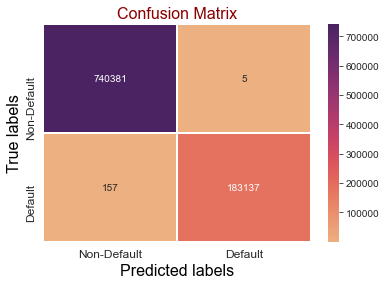

Confusion matrix values
 [[740381      5]
 [   157 183137]]


Classification Report
               precision    recall  f1-score   support

           0      1.000     1.000     1.000    740386
           1      1.000     0.999     1.000    183294

    accuracy                          1.000    923680
   macro avg      1.000     1.000     1.000    923680
weighted avg      1.000     1.000     1.000    923680



ROC_AUC score : 99.957%


In [15]:
# plotting confusion matrix,classification report and roc_auc score for train dataset

# confusion matrix
cm_train_xg=metrics.confusion_matrix(individual_y_train,y_pred_train_xg)

ax= plt.subplot()
sns.heatmap(cm_train_xg, annot=True, fmt='g', ax=ax,cmap='flare',linewidth=0.5);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels',fontdict={'color': 'black','weight': 'normal','size': 16 })
ax.set_ylabel('True labels',fontdict={'color': 'black','weight': 'normal','size': 16 }) 
ax.set_title('Confusion Matrix',fontdict={'color': 'darkred','weight': 'normal','size': 16 }) 
ax.xaxis.set_ticklabels(['Non-Default', 'Default'])
ax.yaxis.set_ticklabels(['Non-Default','Default'])
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.show()

print('\033[1m'+"Confusion matrix values\n"+'\033[0m',cm_train_xg)

# classification report
print('\033[1m'+"\n\nClassification Report\n"+'\033[0m',metrics.classification_report(individual_y_train,y_pred_train_xg,digits=3))

# roc_auc score
auc_score=round(roc_auc_score(individual_y_train,y_pred_train_xg)*100,3)
print('\033[1m'+"\n\nROC_AUC score : "+'\033[0m'+'{}%'.format(auc_score))

#### evaluating the test dataset

In [16]:
# prediction for test dataset
y_pred_test_xg=xg_clf.predict(individual_X_test)

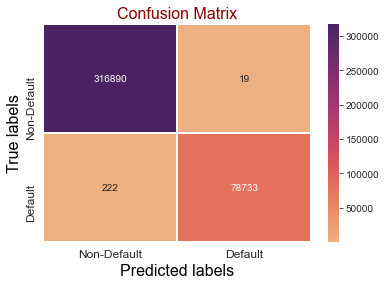

Confusion matrix values
 [[316890     19]
 [   222  78733]]


Classification Report
               precision    recall  f1-score   support

           0      0.999     1.000     1.000    316909
           1      1.000     0.997     0.998     78955

    accuracy                          0.999    395864
   macro avg      1.000     0.999     0.999    395864
weighted avg      0.999     0.999     0.999    395864



ROC_AUC score : 99.856%


In [17]:
# plotting confusion matrix,classification report and roc_auc score for train dataset

# confusion matrix
cm_test_xg=metrics.confusion_matrix(individual_y_test,y_pred_test_xg)

ax= plt.subplot()
sns.heatmap(cm_test_xg, annot=True, fmt='g', ax=ax,cmap='flare',linewidth=0.5);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels',fontdict={'color': 'black','weight': 'normal','size': 16 })
ax.set_ylabel('True labels',fontdict={'color': 'black','weight': 'normal','size': 16 }) 
ax.set_title('Confusion Matrix',fontdict={'color': 'darkred','weight': 'normal','size': 16 }) 
ax.xaxis.set_ticklabels(['Non-Default', 'Default'])
ax.yaxis.set_ticklabels(['Non-Default','Default'])
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.show()

print('\033[1m'+"Confusion matrix values\n"+'\033[0m',cm_test_xg)

# classification report
print('\033[1m'+"\n\nClassification Report\n"+'\033[0m',metrics.classification_report(individual_y_test,y_pred_test_xg,digits=3))

# roc_auc score
auc_score=round(roc_auc_score(individual_y_test,y_pred_test_xg)*100,3)
print('\033[1m'+"\n\nROC_AUC score : "+'\033[0m'+'{}%'.format(auc_score))

### with hyperparameter tunning

In [18]:
# initializing the classifier for tunning
xg_classifier_rv=XGBClassifier(random_state=100)

# defining parameter values
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

# using randomserchCV for hyper parameter tunning
random_search_xg=RandomizedSearchCV(xg_classifier_rv,param_distributions=params,n_iter=5,scoring='roc_auc',
                                 n_jobs=-1,cv=5,verbose=3)

In [19]:
# fitting the parameter on train dataset

start_time = timer(None) # timer starts
random_search_xg.fit(individual_X_train,individual_y_train)
timer(start_time) # timer ends

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[22:08:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 48 minutes and 55.43 seconds.


In [20]:
# checking the best estimator
random_search_xg.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3,
              enable_categorical=False, gamma=0.1, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=12,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=100, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [21]:
# checking the best score after tunning
random_search_xg.best_score_

0.999905343731464

In [22]:
# checking the best param value after tunning
random_search_xg.best_params_

{'min_child_weight': 7,
 'max_depth': 12,
 'learning_rate': 0.1,
 'gamma': 0.1,
 'colsample_bytree': 0.3}

In [23]:
# initializing the classifier based on best estimator
xg_classifier_tunned=random_search_xg.best_estimator_

# fitting the tunned model on train dataset
start_time = timer(None) # timer starts

xg_classifier_tunned.fit(individual_X_train,individual_y_train)

timer(start_time)    # timer ends


[22:10:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 2 minutes and 37.14 seconds.


In [24]:
# prediction for train dataset after tunning
y_train_predict_xg_tunned=xg_classifier_tunned.predict(individual_X_train)

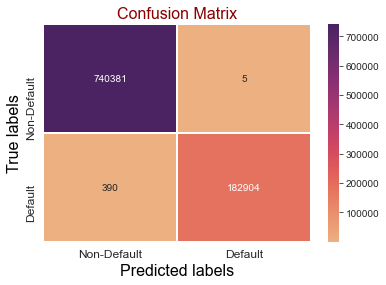

Confusion matrix values
 [[740381      5]
 [   390 182904]]


Classification Report
               precision    recall  f1-score   support

           0      0.999     1.000     1.000    740386
           1      1.000     0.998     0.999    183294

    accuracy                          1.000    923680
   macro avg      1.000     0.999     0.999    923680
weighted avg      1.000     1.000     1.000    923680



ROC_AUC score : 99.893%


In [25]:
# plotting confusion matrix,classification report and roc_auc score for train dataset

# confusion matrix
cm_train_xg_tunned=metrics.confusion_matrix(individual_y_train,y_train_predict_xg_tunned)

ax= plt.subplot()
sns.heatmap(cm_train_xg_tunned, annot=True, fmt='g', ax=ax,cmap='flare',linewidth=0.5);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels',fontdict={'color': 'black','weight': 'normal','size': 16 })
ax.set_ylabel('True labels',fontdict={'color': 'black','weight': 'normal','size': 16 }) 
ax.set_title('Confusion Matrix',fontdict={'color': 'darkred','weight': 'normal','size': 16 }) 
ax.xaxis.set_ticklabels(['Non-Default', 'Default'])
ax.yaxis.set_ticklabels(['Non-Default','Default'])
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.show()

print('\033[1m'+"Confusion matrix values\n"+'\033[0m',cm_train_xg_tunned)

# classification report
print('\033[1m'+"\n\nClassification Report\n"+'\033[0m',metrics.classification_report(individual_y_train,y_train_predict_xg_tunned,digits=3))

# roc_auc score
auc_score=round(roc_auc_score(individual_y_train,y_train_predict_xg_tunned)*100,3)
print('\033[1m'+"\n\nROC_AUC score : "+'\033[0m'+'{}%'.format(auc_score))

#### model evaluation for test dataset

In [26]:
# prediction for test dataset
y_test_predict_xg_tunned=xg_classifier_tunned.predict(individual_X_test)

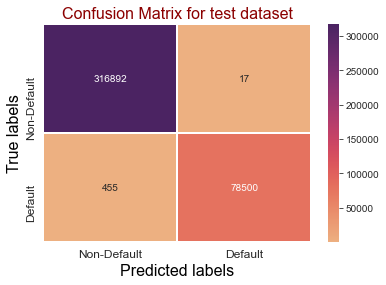

Confusion matrix values
 [[316892     17]
 [   455  78500]]


Classification Report
               precision    recall  f1-score   support

           0      0.999     1.000     0.999    316909
           1      1.000     0.994     0.997     78955

    accuracy                          0.999    395864
   macro avg      0.999     0.997     0.998    395864
weighted avg      0.999     0.999     0.999    395864



ROC_AUC score : 99.709%


In [27]:
# plotting confusion matrix,classification report and roc_auc score for train dataset

# confusion matrix
cm_test_xg_tunned=metrics.confusion_matrix(individual_y_test,y_test_predict_xg_tunned)

ax= plt.subplot()
sns.heatmap(cm_test_xg_tunned, annot=True, fmt='g', ax=ax,cmap='flare',linewidth=0.5);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels',fontdict={'color': 'black','weight': 'normal','size': 16 })
ax.set_ylabel('True labels',fontdict={'color': 'black','weight': 'normal','size': 16 }) 
ax.set_title('Confusion Matrix for test dataset',fontdict={'color': 'darkred','weight': 'normal','size': 16 }) 
ax.xaxis.set_ticklabels(['Non-Default', 'Default'])
ax.yaxis.set_ticklabels(['Non-Default','Default'])
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.show()

print('\033[1m'+"Confusion matrix values\n"+'\033[0m',cm_test_xg_tunned)

# classification report
print('\033[1m'+"\n\nClassification Report\n"+'\033[0m',metrics.classification_report(individual_y_test,y_test_predict_xg_tunned,digits=3))

# roc_auc score
auc_score_xg=round(roc_auc_score(individual_y_test,y_test_predict_xg_tunned)*100,3)
print('\033[1m'+"\n\nROC_AUC score : "+'\033[0m'+'{}%'.format(auc_score_xg))

### Explainability of the result

In [28]:
# compiling the test dataset
start_time = timer(None) # timer starts

xpl_xg = SmartExplainer()
xpl_xg.compile(
    x=individual_X_test,
    model=xg_classifier_tunned,
   
)

timer(start_time)   # timer ends

Backend: Shap TreeExplainer

 Time taken: 0 hours 26 minutes and 28.15 seconds.


In [29]:
# converting the test prediction from array to series and reindexing the output result as per original indexing
y_test_pred_xg=pd.Series(y_test_predict_xg_tunned)
y_test_pred_xg.index=individual_y_test.index
y_test_pred_xg.head()

344869     0
1300957    0
1217813    0
467206     1
865505     0
dtype: int64

In [30]:
# finidng the contribution of the features

start_time = timer(None) # start time

predictor_xg = xpl_xg.to_smartpredictor()
predictor_xg.add_input(x=individual_X_test, ypred=y_test_pred_xg)
detailed_contributions_xg = predictor_xg.detail_contributions()


timer(start_time)   # end time


 Time taken: 0 hours 53 minutes and 22.54 seconds.


In [31]:
# top 5 rows of the feature contribution of the prediction result
detailed_contributions_xg.head()

,ypred,proba,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,title,zip_code,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,debt_settlement_flag,avg_fico_range,avg_last_fico_range
344869,0,0.999729,-0.673087,0.047889,0.07893,-0.486664,0.084661,0.059962,-0.024244,0.029227,0.000318,-0.024571,0.021872,-0.020713,-0.002689,-0.005906,0.022021,-0.002804,0.038471,0.016709,0.001964,-0.00444,-0.02132,-0.015785,-0.001716,-0.009898,0.655239,0.70909,2.163503,-0.029518,-0.038081,1.499926,0.063861,0.007391,-0.024997,0.00338,0.005667,-0.003525,-0.003553,0.02734,-0.011863,0.002727,0.002125,-0.030317,0.003764,-0.030898,0.003034,-0.011276,0.002805,-0.011342,-0.006411,-0.001426,-0.000824,-0.000349,-0.000188,-0.00951,-0.000449,0.002386,0.00318,0.007931,-0.01506,-0.011433,0.008114,-0.0,0.105599,-0.026057,1.549888
1300957,0,0.998049,-0.60101,-0.197552,-0.008256,-0.614649,-0.077536,-0.072662,-0.001881,-0.012949,-0.002346,0.005024,-0.015433,-0.041943,-0.004986,-0.005063,-0.008182,-0.024704,-0.023517,-0.042569,-0.002888,-0.01342,-0.060271,-0.02174,-0.018641,-0.008353,0.5928,0.646677,2.11632,-0.350588,-0.021691,1.526779,0.036386,0.008116,0.014373,-0.004292,-0.019189,0.009096,-0.001318,-0.0317,0.034472,0.008231,-0.001724,0.009439,-0.015746,0.01167,-0.002347,-0.002095,0.000049,-0.006948,0.000535,-0.014453,0.00586,0.006691,-0.000195,-0.01271,0.005308,-0.026854,0.015793,-0.014677,0.004844,-0.011356,-0.007778,-0.0,0.098033,-0.010451,0.974446
1217813,0,0.999574,0.621743,0.087681,0.025826,0.334171,0.026758,0.101591,0.019012,0.031387,0.000032,0.032721,0.013522,-0.005584,0.012208,0.03938,0.006166,-0.000154,-0.014419,-0.024111,0.001112,0.001531,0.020306,-0.004629,-0.002682,-0.013664,0.006091,-0.022371,0.704716,0.253148,-0.017046,1.474095,0.095331,-0.011812,-0.014181,0.004762,-0.009731,-0.037934,0.014139,-0.019351,0.020842,-0.008611,-0.001388,0.004508,-0.000918,-0.002854,-0.016189,0.003001,-0.003404,0.010231,0.007954,-0.00909,0.00272,0.0017,0.004362,0.014614,-0.002744,-0.001304,-0.021667,-0.00201,0.023971,-0.015258,0.00528,-0.0,0.103644,-0.035857,1.405996
467206,1,0.996503,0.595217,-0.115814,0.001088,0.639423,0.046002,0.02403,-0.013924,-0.010661,0.002765,-0.007214,0.028116,-0.000123,-0.019833,-0.015442,0.005238,0.001342,-0.024998,-0.013533,-0.008424,-0.008457,-0.034128,0.022843,0.004959,0.057278,0.765413,0.779487,2.266217,0.184119,0.101014,0.844169,-0.098106,-0.017,-0.0285,-0.005304,-0.009874,0.006045,0.002274,-0.008552,-0.037892,0.01165,-0.005575,0.000358,0.003935,0.009777,0.002531,-0.003931,0.018139,-0.009418,0.033614,0.002538,0.009106,0.00447,-0.004203,-0.001591,-0.003735,0.004357,0.020084,-0.014032,0.00909,-0.009781,-0.001605,0.0,-0.089746,-0.00331,2.31363
865505,0,0.999075,0.248445,0.117834,0.041402,-0.078682,0.101016,0.043398,0.051545,0.035927,0.002086,0.015832,-0.014847,0.049451,-0.001764,-0.010821,-0.014815,0.009813,-0.004217,0.015348,-0.00755,-0.007578,0.023963,-0.01451,-0.00436,-0.026216,0.309534,0.508661,1.802188,0.15994,0.034887,-0.55591,0.073888,-0.036469,-0.023055,0.00734,-0.011985,-0.022375,-0.031115,-0.015343,0.037053,-0.000598,0.001295,-0.004821,-0.010239,-0.055767,-0.019084,0.007058,0.001986,0.000959,0.001321,0.010572,-0.002222,-0.005469,0.005074,-0.001783,-0.000409,-0.003423,-0.013411,-0.009173,-0.002235,

In [32]:
# top 5 feature contribution to the prediction result

start_time = timer(None) # start time

predictor_xg.modify_mask(max_contrib=5)
explanation_xg = predictor_xg.summarize()

timer(start_time)   # end time


 Time taken: 0 hours 1 minutes and 19.54 seconds.


In [33]:
# top 5 rows of the prediction result with top 5 contribution features
explanation_xg.head()

,ypred,proba,feature_1,value_1,contribution_1,feature_2,value_2,contribution_2,feature_3,value_3,contribution_3,feature_4,value_4,contribution_4,feature_5,value_5,contribution_5
344869,0,0.999729,total_rec_prncp,1.815778,2.163503,avg_last_fico_range,1.699223,1.549888,last_pymnt_amnt,0.026586,1.499926,total_pymnt_inv,1.650421,0.70909,loan_amnt,1.592859,-0.673087
1300957,0,0.998049,total_rec_prncp,1.472794,2.11632,last_pymnt_amnt,2.387942,1.526779,avg_last_fico_range,0.209452,0.974446,total_pymnt_inv,2.172106,0.646677,installment,1.552001,-0.614649
1217813,0,0.999574,last_pymnt_amnt,-0.153981,1.474095,avg_last_fico_range,1.699223,1.405996,total_rec_prncp,-0.356458,0.704716,loan_amnt,-0.618464,0.621743,installment,-0.61382,0.334171
467206,1,0.996503,avg_last_fico_range,-2.180388,2.31363,total_rec_prncp,-1.076229,2.266217,last_pymnt_amnt,-0.74218,0.844169,total_pymnt_inv,-1.07907,0.779487,total_pymnt,-1.081318,0.765413
865505,0,0.999075,total_rec_prncp,0.329511,1.802188,avg_last_fico_range,1.32678,1.611476,last_pymnt_amnt,-0.758816,-0.55591,total_pymnt_inv,0.219693,0.508661,total_pymnt,0.217318,0.309534


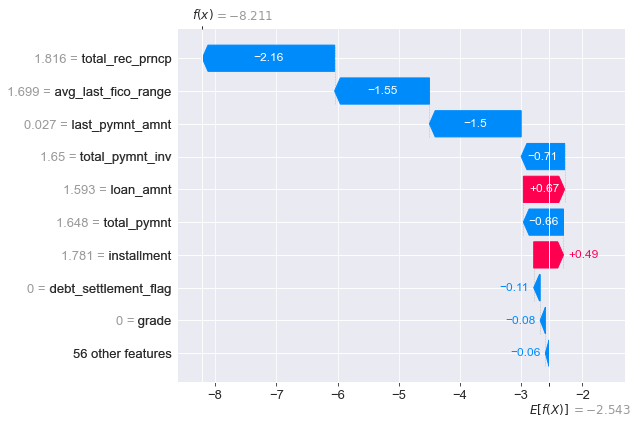


 Time taken: 3 hours 27 minutes and 58.49 seconds.


In [34]:
# plotting the first prediction's explanation using shap waterfall plot

start_time = timer(None) # timing starts from this point for "start_time" variable

explainer_xg = shap.Explainer(xg_classifier_tunned)
shap_values_xg = explainer_xg(individual_X_test)
#shap.summary_plot(shap_values, individual_X_test, plot_type="bar")
shap.plots.waterfall(shap_values_xg[0])

timer(start_time)   # end time

In [35]:
# plotting the first prediction's explanation with a force plot
shap.initjs()
shap.plots.force(shap_values_xg[0])

### LightGBM Model

### Without Hyper Parameter Tunning

In [36]:
# fitting the model on train dataset
lgbm_clf=LGBMClassifier(random_state=100)
start_time = timer(None)
lgbm_clf.fit(individual_X_train,individual_y_train)
timer(start_time)


 Time taken: 0 hours 0 minutes and 15.21 seconds.


In [37]:
# prediction of train dataset
y_pred_train_lgbm=lgbm_clf.predict(individual_X_train)

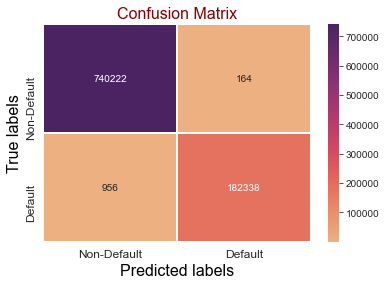

Confusion matrix values
 [[740222    164]
 [   956 182338]]


Classification Report
               precision    recall  f1-score   support

           0      0.999     1.000     0.999    740386
           1      0.999     0.995     0.997    183294

    accuracy                          0.999    923680
   macro avg      0.999     0.997     0.998    923680
weighted avg      0.999     0.999     0.999    923680



ROC_AUC score : 99.728%


In [38]:
# plotting confusion matrix,classification report and roc_auc score for train dataset

# confusion matrix
cm_train_lg=metrics.confusion_matrix(individual_y_train,y_pred_train_lgbm)

ax= plt.subplot()
sns.heatmap(cm_train_lg, annot=True, fmt='g', ax=ax,cmap='flare',linewidth=0.5);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels',fontdict={'color': 'black','weight': 'normal','size': 16 })
ax.set_ylabel('True labels',fontdict={'color': 'black','weight': 'normal','size': 16 }) 
ax.set_title('Confusion Matrix',fontdict={'color': 'darkred','weight': 'normal','size': 16 }) 
ax.xaxis.set_ticklabels(['Non-Default', 'Default'])
ax.yaxis.set_ticklabels(['Non-Default','Default'])
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.show()

print('\033[1m'+"Confusion matrix values\n"+'\033[0m',cm_train_lg)

# classification report
print('\033[1m'+"\n\nClassification Report\n"+'\033[0m',metrics.classification_report(individual_y_train,y_pred_train_lgbm,digits=3))

# roc_auc score
auc_score=round(roc_auc_score(individual_y_train,y_pred_train_lgbm)*100,3)
print('\033[1m'+"\n\nROC_AUC score : "+'\033[0m'+'{}%'.format(auc_score))

### With Hyperparameter Tunning

#### Model learning

In [39]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
params ={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

In [40]:
# hyperparameter tunning
lgb_clf_rcv=LGBMClassifier(random_state=100)
random_search_lgbm=RandomizedSearchCV(lgb_clf_rcv,param_distributions=params,n_iter=5,scoring='roc_auc',
                                 n_jobs=-1,cv=5,verbose=3)

In [41]:
# fitting the model
start_time = timer(None) # timer starts
random_search_lgbm.fit(individual_X_train,individual_y_train)
timer(start_time)        # timer ends

Fitting 5 folds for each of 5 candidates, totalling 25 fits

 Time taken: 0 hours 4 minutes and 5.54 seconds.


In [42]:
# checking the best parameter after tunning
random_search_lgbm.best_estimator_

LGBMClassifier(colsample_bytree=0.7414956815629781, min_child_samples=304,
               min_child_weight=1, num_leaves=32, random_state=100, reg_alpha=5,
               reg_lambda=0.1, subsample=0.9186407379152639)

In [43]:
# checking the best score after tunning
random_search_lgbm.best_score_

0.9998249029296795

In [44]:
# initializing the classifier based on best estimator
lgbm_clf_tunned=random_search_lgbm.best_estimator_

# fitting the model on train dataset
lgbm_clf_tunned.fit(individual_X_train,individual_y_train)

LGBMClassifier(colsample_bytree=0.7414956815629781, min_child_samples=304,
               min_child_weight=1, num_leaves=32, random_state=100, reg_alpha=5,
               reg_lambda=0.1, subsample=0.9186407379152639)

In [45]:
# prediction for train dataset 
y_pred_train_lgb_tunned=lgbm_clf_tunned.predict(individual_X_train)

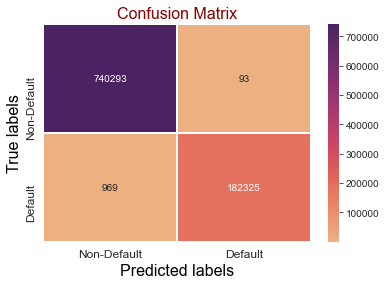

Confusion matrix values
 [[740293     93]
 [   969 182325]]


Classification Report
               precision    recall  f1-score   support

           0      0.999     1.000     0.999    740386
           1      0.999     0.995     0.997    183294

    accuracy                          0.999    923680
   macro avg      0.999     0.997     0.998    923680
weighted avg      0.999     0.999     0.999    923680



ROC_AUC score : 99.729%


In [46]:
# plotting confusion matrix,classification report and roc_auc score for train dataset

# confusion matrix
cm_train_lg_tunned=metrics.confusion_matrix(individual_y_train,y_pred_train_lgb_tunned)

ax= plt.subplot()
sns.heatmap(cm_train_lg_tunned, annot=True, fmt='g', ax=ax,cmap='flare',linewidth=0.5);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels',fontdict={'color': 'black','weight': 'normal','size': 16 })
ax.set_ylabel('True labels',fontdict={'color': 'black','weight': 'normal','size': 16 }) 
ax.set_title('Confusion Matrix',fontdict={'color': 'darkred','weight': 'normal','size': 16 }) 
ax.xaxis.set_ticklabels(['Non-Default', 'Default'])
ax.yaxis.set_ticklabels(['Non-Default','Default'])
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.show()

print('\033[1m'+"Confusion matrix values\n"+'\033[0m',cm_train_lg_tunned)

# classification report
print('\033[1m'+"\n\nClassification Report\n"+'\033[0m',metrics.classification_report(individual_y_train,y_pred_train_lgb_tunned,digits=3))

# roc_auc score
auc_score=round(roc_auc_score(individual_y_train,y_pred_train_lgb_tunned)*100,3)
print('\033[1m'+"\n\nROC_AUC score : "+'\033[0m'+'{}%'.format(auc_score))

#### Evaluating the test dataset

In [47]:
y_test_pred_lg_tunned=lgbm_clf_tunned.predict(individual_X_test)

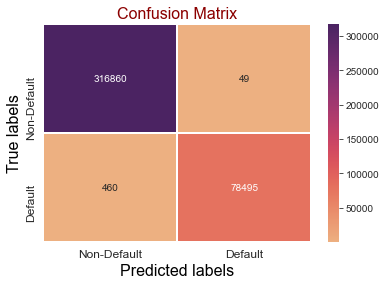

Confusion matrix values
 [[316860     49]
 [   460  78495]]


Classification Report
               precision    recall  f1-score   support

           0      0.999     1.000     0.999    316909
           1      0.999     0.994     0.997     78955

    accuracy                          0.999    395864
   macro avg      0.999     0.997     0.998    395864
weighted avg      0.999     0.999     0.999    395864



ROC_AUC score : 99.701%


In [48]:
# plotting confusion matrix,classification report and roc_auc score for train dataset

# confusion matrix
cm_test_lg_tunned=metrics.confusion_matrix(individual_y_test,y_test_pred_lg_tunned)

ax= plt.subplot()
sns.heatmap(cm_test_lg_tunned, annot=True, fmt='g', ax=ax,cmap='flare',linewidth=0.5);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels',fontdict={'color': 'black','weight': 'normal','size': 16 })
ax.set_ylabel('True labels',fontdict={'color': 'black','weight': 'normal','size': 16 }) 
ax.set_title('Confusion Matrix',fontdict={'color': 'darkred','weight': 'normal','size': 16 }) 
ax.xaxis.set_ticklabels(['Non-Default', 'Default'])
ax.yaxis.set_ticklabels(['Non-Default','Default'])
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.show()

print('\033[1m'+"Confusion matrix values\n"+'\033[0m',cm_test_lg_tunned)

# classification report
print('\033[1m'+"\n\nClassification Report\n"+'\033[0m',metrics.classification_report(individual_y_test,y_test_pred_lg_tunned,digits=3))

# roc_auc score
auc_score=round(roc_auc_score(individual_y_test,y_test_pred_lg_tunned)*100,3)
print('\033[1m'+"\n\nROC_AUC score : "+'\033[0m'+'{}%'.format(auc_score))

### CatBoost Model

### Without hyper parameter Tunning

In [40]:
# initializing the classifier
cat_clf=CatBoostClassifier(random_state=100)

# fitting the model on trainset
start_time = timer(None)
cat_clf.fit(individual_X_train,individual_y_train)
timer(start_time)

Learning rate set to 0.190201
0:	learn: 0.3027152	total: 656ms	remaining: 10m 55s
1:	learn: 0.1634267	total: 1.25s	remaining: 10m 26s
2:	learn: 0.1070856	total: 1.78s	remaining: 9m 53s
3:	learn: 0.0850939	total: 2.26s	remaining: 9m 22s
4:	learn: 0.0696442	total: 2.74s	remaining: 9m 4s
5:	learn: 0.0609687	total: 3.23s	remaining: 8m 55s
6:	learn: 0.0504916	total: 3.7s	remaining: 8m 44s
7:	learn: 0.0449967	total: 4.28s	remaining: 8m 51s
8:	learn: 0.0411071	total: 4.81s	remaining: 8m 49s
9:	learn: 0.0366941	total: 5.33s	remaining: 8m 47s
10:	learn: 0.0334286	total: 5.88s	remaining: 8m 48s
11:	learn: 0.0299248	total: 6.43s	remaining: 8m 49s
12:	learn: 0.0283026	total: 6.9s	remaining: 8m 44s
13:	learn: 0.0264830	total: 7.42s	remaining: 8m 42s
14:	learn: 0.0247374	total: 7.95s	remaining: 8m 42s
15:	learn: 0.0236542	total: 8.45s	remaining: 8m 39s
16:	learn: 0.0221078	total: 9.03s	remaining: 8m 42s
17:	learn: 0.0208967	total: 9.71s	remaining: 8m 49s
18:	learn: 0.0200157	total: 10.3s	remaining: 

158:	learn: 0.0041256	total: 54.2s	remaining: 4m 46s
159:	learn: 0.0041256	total: 54.3s	remaining: 4m 45s
160:	learn: 0.0041256	total: 54.5s	remaining: 4m 43s
161:	learn: 0.0041256	total: 54.6s	remaining: 4m 42s
162:	learn: 0.0041255	total: 54.8s	remaining: 4m 41s
163:	learn: 0.0041255	total: 55s	remaining: 4m 40s
164:	learn: 0.0041255	total: 55.1s	remaining: 4m 39s
165:	learn: 0.0041255	total: 55.3s	remaining: 4m 37s
166:	learn: 0.0041255	total: 55.5s	remaining: 4m 36s
167:	learn: 0.0041255	total: 55.6s	remaining: 4m 35s
168:	learn: 0.0041255	total: 55.8s	remaining: 4m 34s
169:	learn: 0.0041255	total: 55.9s	remaining: 4m 33s
170:	learn: 0.0040914	total: 56.1s	remaining: 4m 31s
171:	learn: 0.0040557	total: 56.3s	remaining: 4m 30s
172:	learn: 0.0040474	total: 56.4s	remaining: 4m 29s
173:	learn: 0.0040441	total: 56.6s	remaining: 4m 28s
174:	learn: 0.0040265	total: 56.8s	remaining: 4m 27s
175:	learn: 0.0039690	total: 57.1s	remaining: 4m 27s
176:	learn: 0.0039628	total: 57.3s	remaining: 4m

313:	learn: 0.0032616	total: 1m 27s	remaining: 3m 10s
314:	learn: 0.0032297	total: 1m 27s	remaining: 3m 10s
315:	learn: 0.0031987	total: 1m 28s	remaining: 3m 10s
316:	learn: 0.0031987	total: 1m 28s	remaining: 3m 10s
317:	learn: 0.0031984	total: 1m 28s	remaining: 3m 10s
318:	learn: 0.0031895	total: 1m 29s	remaining: 3m 10s
319:	learn: 0.0031531	total: 1m 29s	remaining: 3m 10s
320:	learn: 0.0031486	total: 1m 29s	remaining: 3m 9s
321:	learn: 0.0031486	total: 1m 30s	remaining: 3m 9s
322:	learn: 0.0031486	total: 1m 30s	remaining: 3m 9s
323:	learn: 0.0031485	total: 1m 30s	remaining: 3m 9s
324:	learn: 0.0031485	total: 1m 31s	remaining: 3m 9s
325:	learn: 0.0031357	total: 1m 31s	remaining: 3m 8s
326:	learn: 0.0030624	total: 1m 31s	remaining: 3m 8s
327:	learn: 0.0030297	total: 1m 32s	remaining: 3m 8s
328:	learn: 0.0030297	total: 1m 32s	remaining: 3m 8s
329:	learn: 0.0030043	total: 1m 32s	remaining: 3m 8s
330:	learn: 0.0030043	total: 1m 33s	remaining: 3m 8s
331:	learn: 0.0030043	total: 1m 33s	rem

468:	learn: 0.0028420	total: 2m 12s	remaining: 2m 30s
469:	learn: 0.0028420	total: 2m 12s	remaining: 2m 29s
470:	learn: 0.0028351	total: 2m 12s	remaining: 2m 29s
471:	learn: 0.0028351	total: 2m 13s	remaining: 2m 28s
472:	learn: 0.0028351	total: 2m 13s	remaining: 2m 28s
473:	learn: 0.0028351	total: 2m 13s	remaining: 2m 27s
474:	learn: 0.0028351	total: 2m 13s	remaining: 2m 27s
475:	learn: 0.0028351	total: 2m 13s	remaining: 2m 27s
476:	learn: 0.0028351	total: 2m 13s	remaining: 2m 26s
477:	learn: 0.0028350	total: 2m 13s	remaining: 2m 26s
478:	learn: 0.0028350	total: 2m 14s	remaining: 2m 25s
479:	learn: 0.0028350	total: 2m 14s	remaining: 2m 25s
480:	learn: 0.0028350	total: 2m 14s	remaining: 2m 25s
481:	learn: 0.0028350	total: 2m 14s	remaining: 2m 24s
482:	learn: 0.0028350	total: 2m 14s	remaining: 2m 24s
483:	learn: 0.0028350	total: 2m 14s	remaining: 2m 23s
484:	learn: 0.0028350	total: 2m 15s	remaining: 2m 23s
485:	learn: 0.0028350	total: 2m 15s	remaining: 2m 22s
486:	learn: 0.0028349	total:

622:	learn: 0.0027190	total: 2m 38s	remaining: 1m 35s
623:	learn: 0.0027189	total: 2m 38s	remaining: 1m 35s
624:	learn: 0.0027189	total: 2m 38s	remaining: 1m 35s
625:	learn: 0.0027189	total: 2m 38s	remaining: 1m 34s
626:	learn: 0.0027147	total: 2m 39s	remaining: 1m 34s
627:	learn: 0.0027147	total: 2m 39s	remaining: 1m 34s
628:	learn: 0.0027147	total: 2m 39s	remaining: 1m 34s
629:	learn: 0.0027147	total: 2m 39s	remaining: 1m 33s
630:	learn: 0.0027146	total: 2m 39s	remaining: 1m 33s
631:	learn: 0.0027146	total: 2m 39s	remaining: 1m 33s
632:	learn: 0.0027146	total: 2m 40s	remaining: 1m 32s
633:	learn: 0.0027146	total: 2m 40s	remaining: 1m 32s
634:	learn: 0.0027146	total: 2m 40s	remaining: 1m 32s
635:	learn: 0.0027146	total: 2m 40s	remaining: 1m 31s
636:	learn: 0.0027146	total: 2m 40s	remaining: 1m 31s
637:	learn: 0.0027145	total: 2m 40s	remaining: 1m 31s
638:	learn: 0.0027145	total: 2m 41s	remaining: 1m 30s
639:	learn: 0.0027101	total: 2m 41s	remaining: 1m 30s
640:	learn: 0.0026947	total:

776:	learn: 0.0025896	total: 3m 13s	remaining: 55.5s
777:	learn: 0.0025767	total: 3m 13s	remaining: 55.3s
778:	learn: 0.0025585	total: 3m 14s	remaining: 55.1s
779:	learn: 0.0025584	total: 3m 14s	remaining: 54.8s
780:	learn: 0.0025584	total: 3m 14s	remaining: 54.6s
781:	learn: 0.0025584	total: 3m 15s	remaining: 54.4s
782:	learn: 0.0025584	total: 3m 15s	remaining: 54.2s
783:	learn: 0.0025584	total: 3m 15s	remaining: 53.9s
784:	learn: 0.0025584	total: 3m 16s	remaining: 53.7s
785:	learn: 0.0025584	total: 3m 16s	remaining: 53.5s
786:	learn: 0.0025584	total: 3m 16s	remaining: 53.3s
787:	learn: 0.0025584	total: 3m 17s	remaining: 53s
788:	learn: 0.0025584	total: 3m 17s	remaining: 52.8s
789:	learn: 0.0025584	total: 3m 17s	remaining: 52.5s
790:	learn: 0.0025512	total: 3m 18s	remaining: 52.3s
791:	learn: 0.0025512	total: 3m 18s	remaining: 52.1s
792:	learn: 0.0025512	total: 3m 18s	remaining: 51.9s
793:	learn: 0.0025512	total: 3m 19s	remaining: 51.6s
794:	learn: 0.0025512	total: 3m 19s	remaining: 5

933:	learn: 0.0024867	total: 3m 56s	remaining: 16.7s
934:	learn: 0.0024866	total: 3m 57s	remaining: 16.5s
935:	learn: 0.0024866	total: 3m 57s	remaining: 16.2s
936:	learn: 0.0024615	total: 3m 57s	remaining: 16s
937:	learn: 0.0024615	total: 3m 57s	remaining: 15.7s
938:	learn: 0.0024615	total: 3m 57s	remaining: 15.5s
939:	learn: 0.0024615	total: 3m 58s	remaining: 15.2s
940:	learn: 0.0024615	total: 3m 58s	remaining: 14.9s
941:	learn: 0.0024615	total: 3m 58s	remaining: 14.7s
942:	learn: 0.0024615	total: 3m 58s	remaining: 14.4s
943:	learn: 0.0024615	total: 3m 59s	remaining: 14.2s
944:	learn: 0.0024615	total: 3m 59s	remaining: 13.9s
945:	learn: 0.0024615	total: 3m 59s	remaining: 13.7s
946:	learn: 0.0024615	total: 3m 59s	remaining: 13.4s
947:	learn: 0.0024615	total: 3m 59s	remaining: 13.2s
948:	learn: 0.0024614	total: 3m 59s	remaining: 12.9s
949:	learn: 0.0024614	total: 4m	remaining: 12.6s
950:	learn: 0.0024614	total: 4m	remaining: 12.4s
951:	learn: 0.0024614	total: 4m	remaining: 12.1s
952:	le

In [41]:
# prediction for train dataset
y_pred_train_cat=cat_clf.predict(individual_X_train)

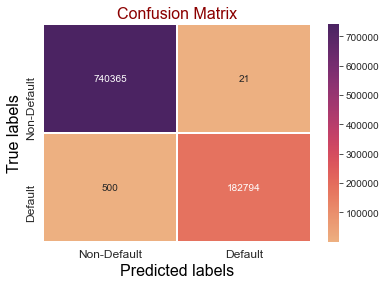

Confusion matrix values
 [[740365     21]
 [   500 182794]]


Classification Report
               precision    recall  f1-score   support

           0      0.999     1.000     1.000    740386
           1      1.000     0.997     0.999    183294

    accuracy                          0.999    923680
   macro avg      1.000     0.999     0.999    923680
weighted avg      0.999     0.999     0.999    923680



ROC_AUC score : 99.862%


In [42]:
# plotting confusion matrix,classification report and roc_auc score for train dataset

# confusion matrix
cm_train_cat=metrics.confusion_matrix(individual_y_train,y_pred_train_cat)

ax= plt.subplot()
sns.heatmap(cm_train_cat, annot=True, fmt='g', ax=ax,cmap='flare',linewidth=0.5);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels',fontdict={'color': 'black','weight': 'normal','size': 16 })
ax.set_ylabel('True labels',fontdict={'color': 'black','weight': 'normal','size': 16 }) 
ax.set_title('Confusion Matrix',fontdict={'color': 'darkred','weight': 'normal','size': 16 }) 
ax.xaxis.set_ticklabels(['Non-Default', 'Default'])
ax.yaxis.set_ticklabels(['Non-Default','Default'])
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.show()

print('\033[1m'+"Confusion matrix values\n"+'\033[0m',cm_train_cat)

# classification report
print('\033[1m'+"\n\nClassification Report\n"+'\033[0m',metrics.classification_report(individual_y_train,y_pred_train_cat,digits=3))

# roc_auc score
auc_score=round(roc_auc_score(individual_y_train,y_pred_train_cat)*100,3)
print('\033[1m'+"\n\nROC_AUC score : "+'\033[0m'+'{}%'.format(auc_score))

#### Evaluating the test dataset

In [43]:
# prediction for test dataset
y_pred_test_cat=cat_clf.predict(individual_X_test)

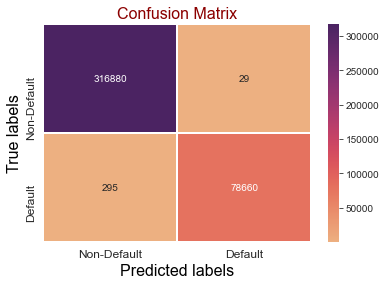

Confusion matrix values
 [[316880     29]
 [   295  78660]]


Classification Report
               precision    recall  f1-score   support

           0      0.999     1.000     0.999    316909
           1      1.000     0.996     0.998     78955

    accuracy                          0.999    395864
   macro avg      0.999     0.998     0.999    395864
weighted avg      0.999     0.999     0.999    395864



ROC_AUC score : 99.809%


In [44]:
# plotting confusion matrix,classification report and roc_auc score for train dataset

# confusion matrix
cm_test_cat=metrics.confusion_matrix(individual_y_test,y_pred_test_cat)

ax= plt.subplot()
sns.heatmap(cm_test_cat, annot=True, fmt='g', ax=ax,cmap='flare',linewidth=0.5);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels',fontdict={'color': 'black','weight': 'normal','size': 16 })
ax.set_ylabel('True labels',fontdict={'color': 'black','weight': 'normal','size': 16 }) 
ax.set_title('Confusion Matrix',fontdict={'color': 'darkred','weight': 'normal','size': 16 }) 
ax.xaxis.set_ticklabels(['Non-Default', 'Default'])
ax.yaxis.set_ticklabels(['Non-Default','Default'])
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.show()

print('\033[1m'+"Confusion matrix values\n"+'\033[0m',cm_test_cat)

# classification report
print('\033[1m'+"\n\nClassification Report\n"+'\033[0m',metrics.classification_report(individual_y_test,y_pred_test_cat,digits=3))

# roc_auc score
auc_score=round(roc_auc_score(individual_y_test,y_pred_test_cat)*100,3)
print('\033[1m'+"\n\nROC_AUC score : "+'\033[0m'+'{}%'.format(auc_score))

### With Hyper parameter tunning

In [54]:
# initializing the classifier for hyper parameter tunning
cat_classifier_rcv=CatBoostClassifier(random_state=100)

# hyper parameter values for tunning
params = {'depth':[3,1,2,6,4,5,7,8,9,10],
          'iterations':[250,100,500,1000],
          'learning_rate':[0.03,0.001,0.01,0.1,0.2,0.3], 
          'l2_leaf_reg':[3,1,5,10,100],
          'border_count':[32,5,10,20,50,100,200]
          
         }
random_search_cat=RandomizedSearchCV(cat_classifier_rcv,param_distributions=params,n_iter=5,scoring='roc_auc',
                                 n_jobs=-1,cv=5,verbose=3)

In [55]:
# fitting the model for tunning
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search_cat.fit(individual_X_train,individual_y_train)
timer(start_time)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
0:	learn: 0.4482886	total: 193ms	remaining: 1m 36s
1:	learn: 0.2962500	total: 386ms	remaining: 1m 36s
2:	learn: 0.2145796	total: 568ms	remaining: 1m 34s
3:	learn: 0.1695974	total: 736ms	remaining: 1m 31s
4:	learn: 0.1321845	total: 947ms	remaining: 1m 33s
5:	learn: 0.1108831	total: 1.16s	remaining: 1m 35s
6:	learn: 0.0957091	total: 1.37s	remaining: 1m 36s
7:	learn: 0.0875147	total: 1.55s	remaining: 1m 35s
8:	learn: 0.0782428	total: 1.75s	remaining: 1m 35s
9:	learn: 0.0724615	total: 1.91s	remaining: 1m 33s
10:	learn: 0.0650352	total: 2.09s	remaining: 1m 32s
11:	learn: 0.0606748	total: 2.26s	remaining: 1m 31s
12:	learn: 0.0544899	total: 2.46s	remaining: 1m 32s
13:	learn: 0.0495276	total: 2.67s	remaining: 1m 32s
14:	learn: 0.0462921	total: 2.87s	remaining: 1m 32s
15:	learn: 0.0428176	total: 3.07s	remaining: 1m 32s
16:	learn: 0.0410765	total: 3.27s	remaining: 1m 32s
17:	learn: 0.0383801	total: 3.47s	remaining: 1m 32s
18:	learn: 0.0

158:	learn: 0.0064153	total: 28.8s	remaining: 1m 1s
159:	learn: 0.0064006	total: 29s	remaining: 1m 1s
160:	learn: 0.0063377	total: 29.2s	remaining: 1m 1s
161:	learn: 0.0063268	total: 29.4s	remaining: 1m 1s
162:	learn: 0.0063143	total: 29.6s	remaining: 1m 1s
163:	learn: 0.0062990	total: 29.8s	remaining: 1m 1s
164:	learn: 0.0062303	total: 30s	remaining: 1m
165:	learn: 0.0061843	total: 30.2s	remaining: 1m
166:	learn: 0.0061599	total: 30.4s	remaining: 1m
167:	learn: 0.0061264	total: 30.5s	remaining: 1m
168:	learn: 0.0060697	total: 30.7s	remaining: 1m
169:	learn: 0.0060150	total: 30.9s	remaining: 60s
170:	learn: 0.0059864	total: 31.1s	remaining: 59.8s
171:	learn: 0.0059684	total: 31.3s	remaining: 59.7s
172:	learn: 0.0059437	total: 31.5s	remaining: 59.6s
173:	learn: 0.0059010	total: 31.7s	remaining: 59.5s
174:	learn: 0.0058905	total: 31.9s	remaining: 59.3s
175:	learn: 0.0058827	total: 32.1s	remaining: 59.1s
176:	learn: 0.0058546	total: 32.3s	remaining: 58.9s
177:	learn: 0.0058546	total: 32.4

318:	learn: 0.0048045	total: 53.1s	remaining: 30.1s
319:	learn: 0.0048044	total: 53.3s	remaining: 30s
320:	learn: 0.0047825	total: 53.4s	remaining: 29.8s
321:	learn: 0.0047312	total: 53.6s	remaining: 29.6s
322:	learn: 0.0047312	total: 53.8s	remaining: 29.5s
323:	learn: 0.0047312	total: 53.9s	remaining: 29.3s
324:	learn: 0.0047312	total: 54s	remaining: 29.1s
325:	learn: 0.0047312	total: 54.2s	remaining: 28.9s
326:	learn: 0.0047124	total: 54.3s	remaining: 28.7s
327:	learn: 0.0047124	total: 54.4s	remaining: 28.5s
328:	learn: 0.0047124	total: 54.6s	remaining: 28.4s
329:	learn: 0.0047123	total: 54.7s	remaining: 28.2s
330:	learn: 0.0047123	total: 54.8s	remaining: 28s
331:	learn: 0.0047123	total: 55s	remaining: 27.8s
332:	learn: 0.0047123	total: 55.1s	remaining: 27.6s
333:	learn: 0.0047123	total: 55.2s	remaining: 27.5s
334:	learn: 0.0047123	total: 55.4s	remaining: 27.3s
335:	learn: 0.0047123	total: 55.5s	remaining: 27.1s
336:	learn: 0.0047123	total: 55.6s	remaining: 26.9s
337:	learn: 0.004712

478:	learn: 0.0043556	total: 1m 15s	remaining: 3.3s
479:	learn: 0.0043556	total: 1m 15s	remaining: 3.14s
480:	learn: 0.0043556	total: 1m 15s	remaining: 2.98s
481:	learn: 0.0043555	total: 1m 15s	remaining: 2.82s
482:	learn: 0.0043555	total: 1m 15s	remaining: 2.67s
483:	learn: 0.0043414	total: 1m 15s	remaining: 2.51s
484:	learn: 0.0043414	total: 1m 16s	remaining: 2.35s
485:	learn: 0.0043414	total: 1m 16s	remaining: 2.19s
486:	learn: 0.0043414	total: 1m 16s	remaining: 2.04s
487:	learn: 0.0043414	total: 1m 16s	remaining: 1.88s
488:	learn: 0.0043413	total: 1m 16s	remaining: 1.72s
489:	learn: 0.0043413	total: 1m 16s	remaining: 1.56s
490:	learn: 0.0043261	total: 1m 16s	remaining: 1.41s
491:	learn: 0.0043261	total: 1m 16s	remaining: 1.25s
492:	learn: 0.0043261	total: 1m 17s	remaining: 1.09s
493:	learn: 0.0043261	total: 1m 17s	remaining: 937ms
494:	learn: 0.0043260	total: 1m 17s	remaining: 781ms
495:	learn: 0.0043258	total: 1m 17s	remaining: 625ms
496:	learn: 0.0043257	total: 1m 17s	remaining: 

In [56]:
# checking the best estimator
random_search_cat.best_estimator_

In [57]:
# checking the best score
random_search_cat.best_score_

0.9998496070857067

In [58]:
# checking the best parameter values
random_search_cat.best_params_

{'learning_rate': 0.1,
 'l2_leaf_reg': 5,
 'iterations': 500,
 'depth': 6,
 'border_count': 200}

In [59]:
# initializing the classifier based on best estimator
cat_clf_tunned=random_search_cat.best_estimator_

# fitting the model on train dataset
cat_clf_tunned.fit(individual_X_train,individual_y_train)

0:	learn: 0.4482886	total: 187ms	remaining: 1m 33s
1:	learn: 0.2962500	total: 377ms	remaining: 1m 33s
2:	learn: 0.2145796	total: 559ms	remaining: 1m 32s
3:	learn: 0.1695974	total: 718ms	remaining: 1m 29s
4:	learn: 0.1321845	total: 920ms	remaining: 1m 31s
5:	learn: 0.1108831	total: 1.1s	remaining: 1m 31s
6:	learn: 0.0957091	total: 1.29s	remaining: 1m 30s
7:	learn: 0.0875147	total: 1.45s	remaining: 1m 29s
8:	learn: 0.0782428	total: 1.64s	remaining: 1m 29s
9:	learn: 0.0724615	total: 1.81s	remaining: 1m 28s
10:	learn: 0.0650352	total: 1.98s	remaining: 1m 28s
11:	learn: 0.0606748	total: 2.15s	remaining: 1m 27s
12:	learn: 0.0544899	total: 2.34s	remaining: 1m 27s
13:	learn: 0.0495276	total: 2.54s	remaining: 1m 28s
14:	learn: 0.0462921	total: 2.71s	remaining: 1m 27s
15:	learn: 0.0428176	total: 2.89s	remaining: 1m 27s
16:	learn: 0.0410765	total: 3.06s	remaining: 1m 26s
17:	learn: 0.0383801	total: 3.24s	remaining: 1m 26s
18:	learn: 0.0362471	total: 3.44s	remaining: 1m 27s
19:	learn: 0.0348411	to

160:	learn: 0.0063377	total: 27.5s	remaining: 57.8s
161:	learn: 0.0063268	total: 27.6s	remaining: 57.7s
162:	learn: 0.0063143	total: 27.8s	remaining: 57.4s
163:	learn: 0.0062990	total: 28s	remaining: 57.3s
164:	learn: 0.0062303	total: 28.1s	remaining: 57.1s
165:	learn: 0.0061843	total: 28.3s	remaining: 56.9s
166:	learn: 0.0061599	total: 28.5s	remaining: 56.8s
167:	learn: 0.0061264	total: 28.6s	remaining: 56.6s
168:	learn: 0.0060697	total: 28.8s	remaining: 56.5s
169:	learn: 0.0060150	total: 29s	remaining: 56.3s
170:	learn: 0.0059864	total: 29.2s	remaining: 56.1s
171:	learn: 0.0059684	total: 29.4s	remaining: 56s
172:	learn: 0.0059437	total: 29.5s	remaining: 55.8s
173:	learn: 0.0059010	total: 29.7s	remaining: 55.7s
174:	learn: 0.0058905	total: 29.9s	remaining: 55.5s
175:	learn: 0.0058827	total: 30.1s	remaining: 55.4s
176:	learn: 0.0058546	total: 30.2s	remaining: 55.2s
177:	learn: 0.0058546	total: 30.4s	remaining: 54.9s
178:	learn: 0.0058183	total: 30.5s	remaining: 54.8s
179:	learn: 0.0058

320:	learn: 0.0047825	total: 51s	remaining: 28.5s
321:	learn: 0.0047312	total: 51.2s	remaining: 28.3s
322:	learn: 0.0047312	total: 51.4s	remaining: 28.1s
323:	learn: 0.0047312	total: 51.5s	remaining: 28s
324:	learn: 0.0047312	total: 51.6s	remaining: 27.8s
325:	learn: 0.0047312	total: 51.8s	remaining: 27.6s
326:	learn: 0.0047124	total: 51.9s	remaining: 27.5s
327:	learn: 0.0047124	total: 52s	remaining: 27.3s
328:	learn: 0.0047124	total: 52.2s	remaining: 27.1s
329:	learn: 0.0047123	total: 52.3s	remaining: 26.9s
330:	learn: 0.0047123	total: 52.4s	remaining: 26.8s
331:	learn: 0.0047123	total: 52.6s	remaining: 26.6s
332:	learn: 0.0047123	total: 52.7s	remaining: 26.4s
333:	learn: 0.0047123	total: 52.8s	remaining: 26.3s
334:	learn: 0.0047123	total: 53s	remaining: 26.1s
335:	learn: 0.0047123	total: 53.1s	remaining: 25.9s
336:	learn: 0.0047123	total: 53.2s	remaining: 25.7s
337:	learn: 0.0047123	total: 53.4s	remaining: 25.6s
338:	learn: 0.0047123	total: 53.5s	remaining: 25.4s
339:	learn: 0.004712

480:	learn: 0.0043556	total: 1m 12s	remaining: 2.88s
481:	learn: 0.0043555	total: 1m 12s	remaining: 2.72s
482:	learn: 0.0043555	total: 1m 13s	remaining: 2.57s
483:	learn: 0.0043414	total: 1m 13s	remaining: 2.42s
484:	learn: 0.0043414	total: 1m 13s	remaining: 2.27s
485:	learn: 0.0043414	total: 1m 13s	remaining: 2.12s
486:	learn: 0.0043414	total: 1m 13s	remaining: 1.97s
487:	learn: 0.0043414	total: 1m 13s	remaining: 1.81s
488:	learn: 0.0043413	total: 1m 13s	remaining: 1.66s
489:	learn: 0.0043413	total: 1m 13s	remaining: 1.51s
490:	learn: 0.0043261	total: 1m 14s	remaining: 1.36s
491:	learn: 0.0043261	total: 1m 14s	remaining: 1.21s
492:	learn: 0.0043261	total: 1m 14s	remaining: 1.06s
493:	learn: 0.0043261	total: 1m 14s	remaining: 905ms
494:	learn: 0.0043260	total: 1m 14s	remaining: 754ms
495:	learn: 0.0043258	total: 1m 14s	remaining: 603ms
496:	learn: 0.0043257	total: 1m 14s	remaining: 452ms
497:	learn: 0.0043256	total: 1m 15s	remaining: 301ms
498:	learn: 0.0043242	total: 1m 15s	remaining:

In [60]:
# prediction for train dataset
y_train_predict_cat_tunned=cat_clf_tunned.predict(individual_X_train)

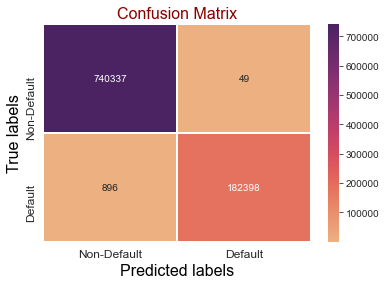

Confusion matrix values
 [[740337     49]
 [   896 182398]]


Classification Report
               precision    recall  f1-score   support

           0      0.999     1.000     0.999    740386
           1      1.000     0.995     0.997    183294

    accuracy                          0.999    923680
   macro avg      0.999     0.998     0.998    923680
weighted avg      0.999     0.999     0.999    923680



ROC_AUC score : 99.752%


In [61]:
# plotting confusion matrix,classification report and roc_auc score for train dataset

# confusion matrix
cm_train_cat_tunned=metrics.confusion_matrix(individual_y_train,y_train_predict_cat_tunned)

ax= plt.subplot()
sns.heatmap(cm_train_cat_tunned, annot=True, fmt='g', ax=ax,cmap='flare',linewidth=0.5);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels',fontdict={'color': 'black','weight': 'normal','size': 16 })
ax.set_ylabel('True labels',fontdict={'color': 'black','weight': 'normal','size': 16 }) 
ax.set_title('Confusion Matrix',fontdict={'color': 'darkred','weight': 'normal','size': 16 }) 
ax.xaxis.set_ticklabels(['Non-Default', 'Default'])
ax.yaxis.set_ticklabels(['Non-Default','Default'])
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.show()

print('\033[1m'+"Confusion matrix values\n"+'\033[0m',cm_train_cat_tunned)

# classification report
print('\033[1m'+"\n\nClassification Report\n"+'\033[0m',metrics.classification_report(individual_y_train,y_train_predict_cat_tunned,digits=3))

# roc_auc score
auc_score=round(roc_auc_score(individual_y_train,y_train_predict_cat_tunned)*100,3)
print('\033[1m'+"\n\nROC_AUC score : "+'\033[0m'+'{}%'.format(auc_score))

#### Evaluating the test dataset

In [62]:
# prediction for test dataset
y_test_predict_cat_tunned=cat_clf_tunned.predict(individual_X_test)

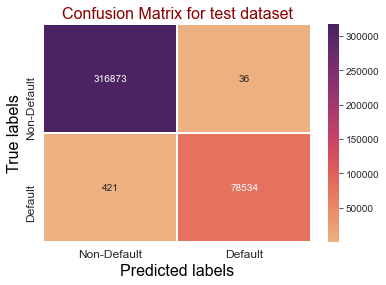

Confusion matrix values
 [[316873     36]
 [   421  78534]]


Classification Report
               precision    recall  f1-score   support

           0      0.999     1.000     0.999    316909
           1      1.000     0.995     0.997     78955

    accuracy                          0.999    395864
   macro avg      0.999     0.997     0.998    395864
weighted avg      0.999     0.999     0.999    395864



ROC_AUC score : 99.728%


In [63]:
# plotting confusion matrix,classification report and roc_auc score for train dataset

# confusion matrix
cm_test_cat_tunned=metrics.confusion_matrix(individual_y_test,y_test_predict_cat_tunned)

ax= plt.subplot()
sns.heatmap(cm_test_cat_tunned, annot=True, fmt='g', ax=ax,cmap='flare',linewidth=0.5);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels',fontdict={'color': 'black','weight': 'normal','size': 16 })
ax.set_ylabel('True labels',fontdict={'color': 'black','weight': 'normal','size': 16 }) 
ax.set_title('Confusion Matrix for test dataset',fontdict={'color': 'darkred','weight': 'normal','size': 16 }) 
ax.xaxis.set_ticklabels(['Non-Default', 'Default'])
ax.yaxis.set_ticklabels(['Non-Default','Default'])
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.show()

print('\033[1m'+"Confusion matrix values\n"+'\033[0m',cm_test_cat_tunned)

# classification report
print('\033[1m'+"\n\nClassification Report\n"+'\033[0m',metrics.classification_report(individual_y_test,y_test_predict_cat_tunned,digits=3))

# roc_auc score
auc_score_xg=round(roc_auc_score(individual_y_test,y_test_predict_cat_tunned)*100,3)
print('\033[1m'+"\n\nROC_AUC score : "+'\033[0m'+'{}%'.format(auc_score_xg))

### Explainability of the model

In [45]:
# compiling the test dataset
start_time = timer(None) # start time

xpl_cat = SmartExplainer()
xpl_cat.compile(
    x=individual_X_test,
    model=cat_clf,
   
)

timer(start_time)   # end time

Backend: Shap TreeExplainer

 Time taken: 0 hours 1 minutes and 0.51 seconds.


In [47]:
# converting the test prediction from array to series and reindexing the output result as per original indexing
y_test_pred_cat=pd.Series(y_pred_test_cat)
y_test_pred_cat.index=individual_y_test.index
y_test_pred_cat.head()

344869     0
1300957    0
1217813    0
467206     1
865505     0
dtype: int64

In [48]:
# finidng the contribution of the features

start_time = timer(None) # start time

predictor_cat = xpl_cat.to_smartpredictor()
predictor_cat.add_input(x=individual_X_test, ypred=y_test_pred_cat)
detailed_contributions_cat = predictor_cat.detail_contributions()


timer(start_time)   # end time


 Time taken: 0 hours 1 minutes and 52.92 seconds.


In [49]:
# top 5 rows of the prediction result with feature contribution
detailed_contributions_cat.head()

,ypred,proba,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,title,zip_code,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,debt_settlement_flag,avg_fico_range,avg_last_fico_range
344869,0,0.999957,-4.995352,0.044291,0.040685,-1.31228,-0.037603,-0.042974,-0.008361,0.102675,-0.024275,0.002487,-0.00003,-0.165542,-0.006571,0.012783,0.003437,-0.044291,0.000988,0.000319,-0.009368,-0.000708,0.012407,-0.031709,-0.011627,-0.095663,0.089353,9.77609,0.059802,-0.2607,1.783084,0.051781,-0.000005,-0.0047,-0.001935,0.000342,0.000112,-0.017246,-0.02739,-0.089784,-0.0004,0.001651,-0.0,0.00027,-0.054937,0.027312,-0.031948,0.047146,-0.0,-0.032885,-0.004542,-0.000057,0.006382,-0.002017,-0.002439,-0.012405,-0.015592,-0.062712,-0.035464,-0.073933,0.024778,0.002037,-0.0,0.102201,-0.014509,1.874298
1300957,0,0.999630,-4.720425,-0.067249,-0.016627,-1.168163,0.023529,0.260972,-0.063913,-0.124638,0.011326,0.017144,-0.000027,-0.271659,-0.000341,-0.009417,-0.009221,-0.003905,0.003821,0.004581,0.008965,-0.001286,-0.010681,-0.041633,-0.01468,-0.095663,0.073047,8.495256,-0.413936,-0.218125,1.455289,-0.012749,0.000011,0.004687,-0.001741,-0.000216,-0.016829,0.015983,-0.002141,0.050612,-0.000315,-0.001073,-0.0,0.000385,0.002129,-0.023666,0.006428,0.005198,-0.0,0.026855,0.071695,-0.000026,0.008839,-0.001469,-0.002594,0.006491,-0.003186,0.017604,0.021784,0.070495,-0.075437,0.000872,-0.0,0.110174,-0.002005,1.010287
1217813,0,0.999989,2.006007,0.082273,0.061082,0.579485,0.005973,-0.061318,0.208812,0.187853,-0.016669,0.001819,0.000069,-0.042963,0.001069,0.001213,-0.016442,0.017698,-0.000919,-0.055239,0.018564,-0.0015,-0.007557,-0.03219,0.033459,-0.088669,0.116026,0.532942,0.174685,-0.049095,2.24918,-0.045605,0.000012,0.062126,-0.001928,0.002899,0.008425,-0.035341,-0.022875,0.037213,-0.000248,-0.001285,-0.0,0.00027,0.006034,-0.019001,0.001217,0.037215,-0.0,0.029287,-0.004529,-0.000022,0.006966,0.02721,-0.000066,-0.022496,-0.010458,-0.078201,0.016103,0.093403,-0.010958,-0.000963,-0.0,0.103386,0.006276,1.858632
467206,1,1.000000,-0.462862,0.053986,0.041423,-0.544379,-0.008932,-0.032952,-0.007262,-0.073492,-0.057028,0.001301,0.00003,-0.036562,-0.002507,0.009131,0.025449,-0.02247,-0.0004,-0.001684,0.001213,0.001474,0.011184,0.001362,-0.059665,0.111888,0.667577,15.496592,-0.084193,0.110032,1.580473,-0.118828,0.000019,0.038785,0.00028,0.029762,-0.015074,-0.0132,-0.002946,-0.117428,0.000271,-0.001398,0.0,-0.000266,-0.010792,0.026969,-0.003275,0.006003,0.0,-0.032798,0.001588,-0.000016,0.002719,0.009838,-0.000571,0.033067,0.014349,0.069691,0.033438,0.016867,-0.027857,0.003077,0.0,-0.219994,-0.023035,4.813843
865505,0,0.999883,-1.301882,0.051315,0.015004,-0.907238,-0.017679,-0.020041,0.033009,0.099822,0.029508,0.001093,-0.00003,0.349389,-0.004819,-0.000765,-0.014127,-0.013153,-0.002351,0.003047,-0.00934,-0.000806,-0.011723,-0.031842,-0.016751,-0.103636,0.185795,7.034464,0.076645,0.268975,-2.331183,0.325547,-0.000003,0.041317,-0.001942,-0.00026,0.006672,-0.035503,0.01329,0.044455,-0.000248,0.001684,-0.0,0.000267,-0.019112,-0.013004,0.006441,-0.005138,-0.0,-0.059651,-0.004533,-0.000062,0.000583,0.000574,0.000245,-0.022496,-0.015811,-0.08131,0.01825,-0.049494,0.015074,0.006772,-0.0,0.15972,-0.000895,1.848477


In [50]:
# top 5 feature contribution to the prediction result

start_time = timer(None) # start time

predictor_cat.modify_mask(max_contrib=5)
explanation_cat = predictor_cat.summarize()

timer(start_time)   # end time



 Time taken: 0 hours 1 minutes and 14.89 seconds.


In [51]:
# top 5 result explanation of the test prediction with top 5 feature contribution
explanation_cat.head()

,ypred,proba,feature_1,value_1,contribution_1,feature_2,value_2,contribution_2,feature_3,value_3,contribution_3,feature_4,value_4,contribution_4,feature_5,value_5,contribution_5
344869,0,0.999957,total_rec_prncp,1.815778,9.77609,loan_amnt,1.592859,-4.995352,avg_last_fico_range,1.699223,1.874298,last_pymnt_amnt,0.026586,1.783084,installment,1.780528,-1.31228
1300957,0,0.999630,total_rec_prncp,1.472794,8.495256,loan_amnt,1.243703,-4.720425,last_pymnt_amnt,2.387942,1.455289,installment,1.552001,-1.168163,avg_last_fico_range,0.209452,1.010287
1217813,0,0.999989,last_pymnt_amnt,-0.153981,2.24918,loan_amnt,-0.618464,2.006007,avg_last_fico_range,1.699223,1.858632,installment,-0.61382,0.579485,total_rec_prncp,-0.356458,0.532942
467206,1,1.000000,total_rec_prncp,-1.076229,15.496592,avg_last_fico_range,-2.180388,4.813843,last_pymnt_amnt,-0.74218,1.580473,total_pymnt,-1.081318,0.667577,installment,-0.634767,-0.544379
865505,0,0.999883,total_rec_prncp,0.329511,7.034464,last_pymnt_amnt,-0.758816,-2.331183,avg_last_fico_range,1.32678,1.848477,loan_amnt,0.079848,-1.301882,installment,0.153129,-0.907238


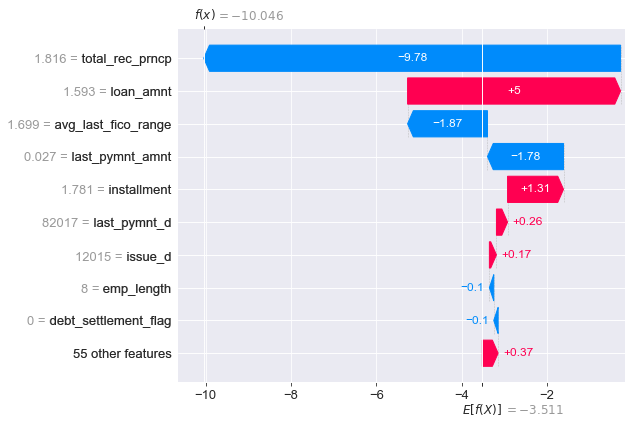


 Time taken: 0 hours 0 minutes and 42.07 seconds.


In [52]:
# plotting the first prediction's explanation using shap waterfall plot

start_time = timer(None) # timing starts from this point for "start_time" variable

explainer_cat = shap.Explainer(cat_clf)
shap_values_cat = explainer_cat(individual_X_test)
#shap.summary_plot(shap_values, individual_X_test, plot_type="bar")
shap.plots.waterfall(shap_values_cat[0])

timer(start_time)   # end time

In [53]:
# plotting the first prediction's explanation with a force plot
shap.initjs()
shap.plots.force(shap_values_cat[0])

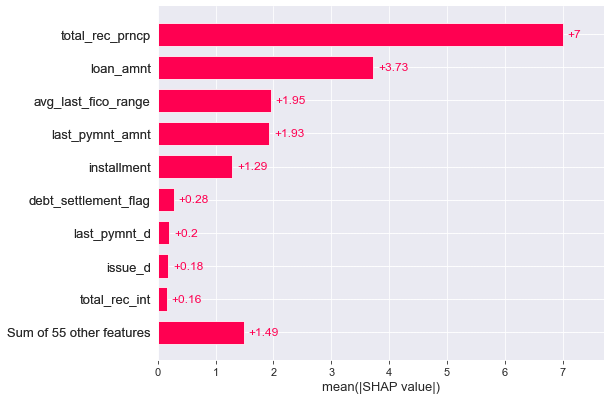

In [54]:
shap.plots.bar(shap_values_cat)

### Stacking Model

In [72]:
# initializing the classifier
clf1 = XGBClassifier(random_state=100)
clf2 = LGBMClassifier(random_state=100)
clf3 = CatBoostClassifier(random_state=100)
lr = LogisticRegression(random_state=100)
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3], 
                          meta_classifier=lr)

# fitting the model on train dataset
start_time = timer(None)
sclf.fit(individual_X_train,individual_y_train)
timer(start_time)

[06:34:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate set to 0.190201
0:	learn: 0.3066566	total: 177ms	remaining: 2m 56s
1:	learn: 0.1641799	total: 394ms	remaining: 3m 16s
2:	learn: 0.1169692	total: 572ms	remaining: 3m 10s
3:	learn: 0.0831022	total: 778ms	remaining: 3m 13s
4:	learn: 0.0698869	total: 926ms	remaining: 3m 4s
5:	learn: 0.0581987	total: 1.13s	remaining: 3m 7s
6:	learn: 0.0522851	total: 1.3s	remaining: 3m 4s
7:	learn: 0.0482809	total: 1.45s	remaining: 2m 59s
8:	learn: 0.0421993	total: 1.63s	remaining: 2m 59s
9:	learn: 0.0371227	total: 1.82s	remaining: 3m
10:	learn: 0.0330826	total: 2.01s	remaining: 3m
11:	learn: 0.0311571	total: 2.15s	remaining: 2m 57s
12:	learn: 0.0294733	total: 2.3s	remaining: 2m 54s
13:	lea

152:	learn: 0.0044094	total: 25.8s	remaining: 2m 22s
153:	learn: 0.0043221	total: 26s	remaining: 2m 22s
154:	learn: 0.0043139	total: 26.1s	remaining: 2m 22s
155:	learn: 0.0042863	total: 26.3s	remaining: 2m 22s
156:	learn: 0.0042863	total: 26.4s	remaining: 2m 21s
157:	learn: 0.0042685	total: 26.5s	remaining: 2m 21s
158:	learn: 0.0042157	total: 26.7s	remaining: 2m 21s
159:	learn: 0.0041981	total: 26.9s	remaining: 2m 21s
160:	learn: 0.0041400	total: 27.1s	remaining: 2m 21s
161:	learn: 0.0041014	total: 27.3s	remaining: 2m 21s
162:	learn: 0.0040925	total: 27.4s	remaining: 2m 20s
163:	learn: 0.0040828	total: 27.6s	remaining: 2m 20s
164:	learn: 0.0040736	total: 27.8s	remaining: 2m 20s
165:	learn: 0.0040732	total: 27.9s	remaining: 2m 20s
166:	learn: 0.0040570	total: 28.1s	remaining: 2m 20s
167:	learn: 0.0040158	total: 28.3s	remaining: 2m 19s
168:	learn: 0.0039943	total: 28.5s	remaining: 2m 19s
169:	learn: 0.0039574	total: 28.6s	remaining: 2m 19s
170:	learn: 0.0039471	total: 28.8s	remaining: 2m

309:	learn: 0.0033726	total: 49.4s	remaining: 1m 49s
310:	learn: 0.0033341	total: 49.6s	remaining: 1m 49s
311:	learn: 0.0033341	total: 49.7s	remaining: 1m 49s
312:	learn: 0.0033341	total: 49.9s	remaining: 1m 49s
313:	learn: 0.0033341	total: 50s	remaining: 1m 49s
314:	learn: 0.0033341	total: 50.2s	remaining: 1m 49s
315:	learn: 0.0033340	total: 50.3s	remaining: 1m 48s
316:	learn: 0.0033287	total: 50.5s	remaining: 1m 48s
317:	learn: 0.0033287	total: 50.6s	remaining: 1m 48s
318:	learn: 0.0033080	total: 50.8s	remaining: 1m 48s
319:	learn: 0.0033080	total: 50.9s	remaining: 1m 48s
320:	learn: 0.0033080	total: 51.1s	remaining: 1m 48s
321:	learn: 0.0033080	total: 51.2s	remaining: 1m 47s
322:	learn: 0.0033080	total: 51.3s	remaining: 1m 47s
323:	learn: 0.0033079	total: 51.4s	remaining: 1m 47s
324:	learn: 0.0033079	total: 51.6s	remaining: 1m 47s
325:	learn: 0.0033079	total: 51.7s	remaining: 1m 46s
326:	learn: 0.0033079	total: 51.8s	remaining: 1m 46s
327:	learn: 0.0033079	total: 52s	remaining: 1m 4

465:	learn: 0.0031830	total: 1m 12s	remaining: 1m 22s
466:	learn: 0.0031830	total: 1m 12s	remaining: 1m 22s
467:	learn: 0.0031830	total: 1m 12s	remaining: 1m 22s
468:	learn: 0.0031830	total: 1m 12s	remaining: 1m 22s
469:	learn: 0.0031830	total: 1m 13s	remaining: 1m 22s
470:	learn: 0.0031830	total: 1m 13s	remaining: 1m 22s
471:	learn: 0.0031830	total: 1m 13s	remaining: 1m 22s
472:	learn: 0.0031830	total: 1m 13s	remaining: 1m 21s
473:	learn: 0.0031830	total: 1m 13s	remaining: 1m 21s
474:	learn: 0.0031830	total: 1m 13s	remaining: 1m 21s
475:	learn: 0.0031830	total: 1m 13s	remaining: 1m 21s
476:	learn: 0.0031830	total: 1m 14s	remaining: 1m 21s
477:	learn: 0.0031830	total: 1m 14s	remaining: 1m 21s
478:	learn: 0.0031830	total: 1m 14s	remaining: 1m 20s
479:	learn: 0.0031830	total: 1m 14s	remaining: 1m 20s
480:	learn: 0.0031830	total: 1m 14s	remaining: 1m 20s
481:	learn: 0.0031829	total: 1m 14s	remaining: 1m 20s
482:	learn: 0.0031829	total: 1m 15s	remaining: 1m 20s
483:	learn: 0.0031829	total:

619:	learn: 0.0030597	total: 1m 35s	remaining: 58.4s
620:	learn: 0.0030597	total: 1m 35s	remaining: 58.2s
621:	learn: 0.0030597	total: 1m 35s	remaining: 58.1s
622:	learn: 0.0030597	total: 1m 35s	remaining: 57.9s
623:	learn: 0.0030597	total: 1m 35s	remaining: 57.8s
624:	learn: 0.0030596	total: 1m 36s	remaining: 57.6s
625:	learn: 0.0030596	total: 1m 36s	remaining: 57.5s
626:	learn: 0.0030596	total: 1m 36s	remaining: 57.3s
627:	learn: 0.0030596	total: 1m 36s	remaining: 57.1s
628:	learn: 0.0030596	total: 1m 36s	remaining: 57s
629:	learn: 0.0030596	total: 1m 36s	remaining: 56.8s
630:	learn: 0.0030596	total: 1m 36s	remaining: 56.7s
631:	learn: 0.0030596	total: 1m 37s	remaining: 56.5s
632:	learn: 0.0030596	total: 1m 37s	remaining: 56.4s
633:	learn: 0.0030596	total: 1m 37s	remaining: 56.2s
634:	learn: 0.0030286	total: 1m 37s	remaining: 56.1s
635:	learn: 0.0030286	total: 1m 37s	remaining: 55.9s
636:	learn: 0.0030285	total: 1m 37s	remaining: 55.8s
637:	learn: 0.0030285	total: 1m 38s	remaining: 5

775:	learn: 0.0028427	total: 1m 58s	remaining: 34.1s
776:	learn: 0.0028426	total: 1m 58s	remaining: 34s
777:	learn: 0.0028426	total: 1m 58s	remaining: 33.8s
778:	learn: 0.0028426	total: 1m 58s	remaining: 33.7s
779:	learn: 0.0028426	total: 1m 58s	remaining: 33.5s
780:	learn: 0.0028426	total: 1m 58s	remaining: 33.4s
781:	learn: 0.0028059	total: 1m 59s	remaining: 33.2s
782:	learn: 0.0028059	total: 1m 59s	remaining: 33.1s
783:	learn: 0.0028059	total: 1m 59s	remaining: 32.9s
784:	learn: 0.0028059	total: 1m 59s	remaining: 32.7s
785:	learn: 0.0027939	total: 1m 59s	remaining: 32.6s
786:	learn: 0.0027938	total: 1m 59s	remaining: 32.4s
787:	learn: 0.0027938	total: 1m 59s	remaining: 32.3s
788:	learn: 0.0027938	total: 2m	remaining: 32.1s
789:	learn: 0.0027938	total: 2m	remaining: 32s
790:	learn: 0.0027938	total: 2m	remaining: 31.8s
791:	learn: 0.0027938	total: 2m	remaining: 31.6s
792:	learn: 0.0027938	total: 2m	remaining: 31.5s
793:	learn: 0.0027938	total: 2m	remaining: 31.3s
794:	learn: 0.0027938

932:	learn: 0.0026572	total: 2m 20s	remaining: 10.1s
933:	learn: 0.0026572	total: 2m 20s	remaining: 9.96s
934:	learn: 0.0026572	total: 2m 21s	remaining: 9.81s
935:	learn: 0.0026572	total: 2m 21s	remaining: 9.66s
936:	learn: 0.0026572	total: 2m 21s	remaining: 9.51s
937:	learn: 0.0026572	total: 2m 21s	remaining: 9.36s
938:	learn: 0.0026572	total: 2m 21s	remaining: 9.21s
939:	learn: 0.0026572	total: 2m 21s	remaining: 9.06s
940:	learn: 0.0026572	total: 2m 22s	remaining: 8.91s
941:	learn: 0.0026572	total: 2m 22s	remaining: 8.75s
942:	learn: 0.0026571	total: 2m 22s	remaining: 8.6s
943:	learn: 0.0026571	total: 2m 22s	remaining: 8.45s
944:	learn: 0.0026571	total: 2m 22s	remaining: 8.3s
945:	learn: 0.0026571	total: 2m 22s	remaining: 8.15s
946:	learn: 0.0026571	total: 2m 22s	remaining: 8s
947:	learn: 0.0026571	total: 2m 23s	remaining: 7.85s
948:	learn: 0.0026571	total: 2m 23s	remaining: 7.7s
949:	learn: 0.0026571	total: 2m 23s	remaining: 7.55s
950:	learn: 0.0026569	total: 2m 23s	remaining: 7.4s


In [73]:
# prediction of train dataset
y_pred_train_stack=sclf.predict(individual_X_train)

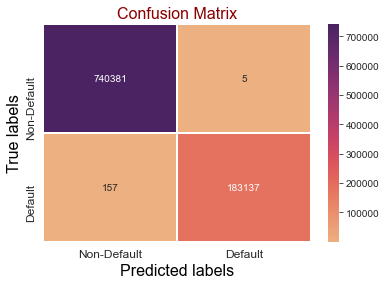

Confusion matrix values
 [[740381      5]
 [   157 183137]]


Classification Report
               precision    recall  f1-score   support

           0      1.000     1.000     1.000    740386
           1      1.000     0.999     1.000    183294

    accuracy                          1.000    923680
   macro avg      1.000     1.000     1.000    923680
weighted avg      1.000     1.000     1.000    923680



ROC_AUC score : 99.957%


In [74]:
# plotting confusion matrix,classification report and roc_auc score for train dataset

# confusion matrix
cm_train_stack=metrics.confusion_matrix(individual_y_train,y_pred_train_stack)

ax= plt.subplot()
sns.heatmap(cm_train_stack, annot=True, fmt='g', ax=ax,cmap='flare',linewidth=0.5);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels',fontdict={'color': 'black','weight': 'normal','size': 16 })
ax.set_ylabel('True labels',fontdict={'color': 'black','weight': 'normal','size': 16 }) 
ax.set_title('Confusion Matrix',fontdict={'color': 'darkred','weight': 'normal','size': 16 }) 
ax.xaxis.set_ticklabels(['Non-Default', 'Default'])
ax.yaxis.set_ticklabels(['Non-Default','Default'])
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.show()

print('\033[1m'+"Confusion matrix values\n"+'\033[0m',cm_train_stack)

# classification report
print('\033[1m'+"\n\nClassification Report\n"+'\033[0m',metrics.classification_report(individual_y_train,y_pred_train_stack,digits=3))

# roc_auc score
auc_score=round(roc_auc_score(individual_y_train,y_pred_train_stack)*100,3)
print('\033[1m'+"\n\nROC_AUC score : "+'\033[0m'+'{}%'.format(auc_score))

#### Evaluating the test dataset

In [75]:
# prediction of test dataset
y_pred_test_stack=sclf.predict(individual_X_test)

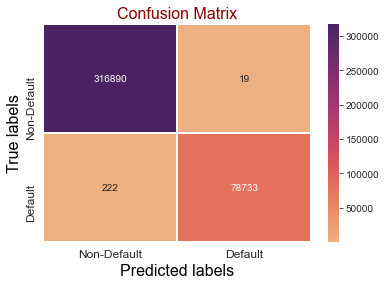

Confusion matrix values
 [[316890     19]
 [   222  78733]]


Classification Report
               precision    recall  f1-score   support

           0      0.999     1.000     1.000    316909
           1      1.000     0.997     0.998     78955

    accuracy                          0.999    395864
   macro avg      1.000     0.999     0.999    395864
weighted avg      0.999     0.999     0.999    395864



ROC_AUC score : 99.856%


In [76]:
# plotting confusion matrix,classification report and roc_auc score for train dataset

# confusion matrix
cm_test_stack=metrics.confusion_matrix(individual_y_test,y_pred_test_stack)

ax= plt.subplot()
sns.heatmap(cm_test_stack, annot=True, fmt='g', ax=ax,cmap='flare',linewidth=0.5);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels',fontdict={'color': 'black','weight': 'normal','size': 16 })
ax.set_ylabel('True labels',fontdict={'color': 'black','weight': 'normal','size': 16 }) 
ax.set_title('Confusion Matrix',fontdict={'color': 'darkred','weight': 'normal','size': 16 }) 
ax.xaxis.set_ticklabels(['Non-Default', 'Default'])
ax.yaxis.set_ticklabels(['Non-Default','Default'])
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.show()

print('\033[1m'+"Confusion matrix values\n"+'\033[0m',cm_test_stack)

# classification report
print('\033[1m'+"\n\nClassification Report\n"+'\033[0m',metrics.classification_report(individual_y_test,y_pred_test_stack,digits=3))

# roc_auc score
auc_score=round(roc_auc_score(individual_y_test,y_pred_test_stack)*100,3)
print('\033[1m'+"\n\nROC_AUC score : "+'\033[0m'+'{}%'.format(auc_score))

# Joint Dataset

## preprocessing

In [55]:
# reading the csv file
joint_df=pd.read_csv('joint_app_df.csv').iloc[:,1:]

In [56]:
joint_df.shape

(25806, 90)

In [57]:
# splitting the target feature
X_joint=joint_df.drop('target',axis=1)
y_joint=joint_df['target']

In [58]:
# splitting into the train and test dataset


joint_X_train, joint_X_test, joint_y_train, joint_y_test = train_test_split(X_joint, y_joint, test_size=0.3,random_state=100)


In [59]:
# categorical variable
cat_var_joint=pd.Index(['term', 'grade', 'sub_grade','emp_title', 'emp_length','home_ownership', 'verification_status','issue_d',
               'purpose','title','addr_state','earliest_cr_line','initial_list_status','last_pymnt_d','last_credit_pull_d',
               'verification_status_joint','sec_app_earliest_cr_line','disbursement_method','debt_settlement_flag'])

In [60]:
# creating a list of columns for numerical features only
numerical_cols=joint_X_train.columns
len(numerical_cols)

89

In [61]:
# checking the length of categorical varible count
len(cat_var_joint)

19

In [62]:
# dropping the categorical feature name from the scaling column list
numerical_cols=numerical_cols.drop(cat_var_joint)
len(numerical_cols)

70

In [63]:
# initializing the scaler object
scaler = StandardScaler()

# scaling the train dataset
joint_X_train[numerical_cols]=scaler.fit_transform(joint_X_train[numerical_cols])
joint_X_train.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,title,zip_code,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,annual_inc_joint,dti_joint,verification_status_joint,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,disbursement_method,debt_settlement_flag,avg_fico_range,avg_last_fico_range,sec_avg_last_fico_range
23453,-1.366827,0,1.021190,-1.232259,3,18,10411,10,0,0.217815,0,102017,8,10,-0.039667,47,-0.032143,101984,-0.674973,-0.802954,-0.756026,1.200109,-0.130360,1,-0.964614,-0.882115,-0.680767,82018,-0.608063,102017,0.642976,1.454853,0,-0.242856,0.214433,-0.249839,-0.882521,-1.127961,1.650624,-0.685386,-1.156927,-0.123683,0.227683,0.048625,-0.093468,-1.121290,-0.826476,0.103082,-0.579132,-0.209645,0.420313,-0.981228,1.686820,0.976831,2.197825,-0.228385,-0.561692,0.067963,1.184275,0.075316,-1.094507,-0.685416,-1.283737,-0.666973,-0.386829,-0.860145,0.197414,-0.671817,-0.798572,-0.048925,0.015422,1.568918,-0.355860,-0.838578,-0.928479,-0.485394,1.824077,72007,-1.079269,2.366308,0.697799,0.273314,0.228888,0.674492,0,0,-0.374130,0.129572,0.456715
22576,-0.397440,0,0.841296,-0.059205,3,17,759,10,3,-0.532009,2,102017,5,7,-1.511168,33,-0.411410,32001,2.303581,-1.000703,-0.987488,-0.204669,0.144031,1,-0.854301,-1.025939,0.062886,82018,-0.947176,22019,-1.210419,-0.108410,0,-0.636605,1.470029,-0.249839,1.758827,1.639037,-1.065051,1.422151,1.556913,0.719413,0.227683,-1.321918,1.256334,-1.116445,0.601839,-0.341326,0.447506,0.818880,-0.237572,0.234059,-0.011581,1.630003,-0.257825,-0.684689,-0.740417,-1.048111,0.261428,-0.312791,-1.632586,-0.685416,-1.712909,-1.457329,1.403340,-0.860145,-0.677520,-0.671817,-0.996392,1.173467,0.740999,-0.003786,-0.787798,0.790958,-1.246231,0.835496,-0.164908,42014,0.400609,-1.230847,-1.312610,-0.496219,-1.653915,-1.160202,0,0,-0.098703,-1.992571,-0.698374
7379,-1.706112,0,0.481508,-1.601311,3,15,4020,0,3,-0.361594,1,72017,7,9,-0.909190,26,-1.267243,32000,-0.674973,-1.000703,-1.150468,-1.714223,-1.502314,0,-1.295739,-1.188018,-0.971362,122018,-0.963250,122018,-0.652167,-1.001892,1,-1.085631,1.470029,-0.817953,0.438153,-0.436211,-0.909870,-0.693223,1.279990,-0.123683,-0.248564,-1.147653,-1.057613,-0.074890,-0.826476,-0.785734,-1.092451,-0.552487,-0.987803,1.464952,-1.686671,-2.158393,0.339191,-1.140994,-1.276593,-1.048111,-1.095701,0.075316,-0.018349,-0.685416,0.003778,-0.403520,-1.200542,-0.614936,-0.969165,-0.671817,-0.996392,-0.048925,0.740999,-1.142640,-1.048394,-0.957327,0.253559,-0.853421,-1.480018,82009,-1.079269,-1.230847,-0.419095,2.024830,2.111691,-1.343672,0,0,1.553857,1.256961,-1.935969
18536,1.056640,0,-0.186139,1.447489,2,11,5000,10,0,-0.191180,1,12017,2,3,1.264617,4,0.045961,112001,-0.674973,1.570044,-0.773030,-1.124372,2.430621,1,0.253304,-0.139955,1.553846,82018,-0.902970,12019,-0.272556,0.113973,0,0.219157,1.470029,-0.817953,-0.882521,-0.436211,0.486763,-0.434526,0.116916,2.405605,2.608918,-0.721216,-0.479126,-0.142712,-0.826476,0.991897,-0.579132,2.533087,-0.338444,-0.826267,0.601175,-0.177106,0.057579,-0.867211,-0.740417,-0.490074,-0.93

In [64]:
# scaling the test dataset
joint_X_test[numerical_cols]=scaler.transform(joint_X_test[numerical_cols])
joint_X_test.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,title,zip_code,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,annual_inc_joint,dti_joint,verification_status_joint,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,disbursement_method,debt_settlement_flag,avg_fico_range,avg_last_fico_range,sec_avg_last_fico_range
6721,-1.151138,0,0.661402,-0.988792,3,16,10549,4,3,-0.482111,1,72017,2,3,-1.812156,18,-0.392877,32004,0.814304,1.174545,-0.466582,0.020406,2.247694,1,-0.738817,-0.687649,-0.391834,102018,-0.512668,32019,-1.066077,-0.734769,1,-0.607854,1.470029,2.022616,1.758827,2.330787,-0.521916,1.376714,1.169221,2.405605,2.132671,-0.189964,0.967091,-0.607779,-0.112318,-0.785734,1.987462,2.533087,-0.804474,-0.546679,0.318108,0.650245,-0.190238,-0.775950,-0.561692,-1.048111,-0.932846,-0.700899,1.057809,0.838209,0.432949,0.123384,2.379795,0.365899,0.343236,0.733469,1.179625,2.395859,-0.831083,-1.142640,-0.715910,0.902900,-0.509046,0.864730,-1.341682,122007,1.880487,-1.230847,-1.535989,-0.590641,-1.026314,-1.343672,0,0,-1.062696,-0.003062,-0.368348
12582,0.571947,1,-0.278868,0.000792,2,11,7766,1,0,0.081483,2,32016,2,3,0.495423,17,0.086337,121996,-0.674973,0.383545,0.159043,0.788765,0.326958,1,1.136488,0.865899,2.403174,82018,0.503974,102018,0.174045,-0.315003,0,0.042809,1.470029,1.454502,0.438153,0.255538,-0.909870,0.233272,-0.713851,-0.966778,-0.248564,0.702120,0.099361,-0.380090,-0.112318,1.436305,-0.579132,0.133197,-0.137859,-0.859677,1.230583,0.584928,0.609537,0.319181,-0.561692,0.067963,-0.281424,-0.312791,-0.018349,-0.304510,-0.425394,0.123384,0.101399,-0.124518,0.343236,-0.320495,0.388346,-0.048925,0.181700,1.568918,0.040568,0.161347,-0.197649,0.688424,0.194214,82006,0.400609,0.208015,0.027663,-0.019392,0.228888,0.124084,0,0,-0.374130,-0.268330,-0.005320
19905,2.026027,1,0.103175,1.237289,2,13,4938,2,3,-0.191180,1,122017,2,3,0.997071,3,-0.715883,82008,-0.674973,2.361043,-0.587377,-1.252432,0.509885,1,1.941104,2.176909,-0.537202,22018,2.797010,122017,1.915789,0.315302,1,-0.984704,1.470029,0.886388,0.438153,0.947288,-1.142642,-0.404300,1.169221,2.405605,2.608918,0.519910,-0.720162,0.695376,-0.112318,0.103082,1.987462,2.533087,-1.080968,2.108918,-1.227104,-0.264195,-1.429328,-1.049733,-1.097868,-1.048111,-1.095701,-1.283060,-0.018349,-0.685416,2.149635,1.440644,-0.224086,2.572779,1.363993,-0.671817,2.366543,2.395859,0.227049,-0.871485,-0.888554,-0.564366,1.168685,-0.590529,1.824077,102004,0.400609,-0.511416,2.038072,-0.491498,2.111691,1.958778,0,0,0.314437,0.461157,0.786741
13375,0.087254,1,-0.152757,-0.342960,2,12,7109,1,0,-0.600175,1,32016,2,3,-1.076406,44,0.477518,11989,-0.674973,-0.605204,0.215817,0.753840,-0.038896,1,0.678596,0.428895,2.091195,102018,0.126667,102018,1.424528,-1.075581,0,0.555990,-1.041163,-0.817953,-0.882521,-0.436211,-0.211553,-0.098684,-0.049237,-0.966778,-0.248564,0.808216,0.436811,-0.321957,-0.826476,-0.341326,-1.092451,-0.552487,1.336687,-0.826377,1.107365,1.042148,1.668396,0.319181,1.225560,1.184036,-0.281424,1.239639,-0.018349,-0.304510,0.003778,-0.4035

## Modeling

### XGBoost

### without hyper parameter tunning

In [65]:
# initializing the classifier
xg_clf_jnt=XGBClassifier(random_state=100)

# fitting the classifier on the train dataset
xg_clf_jnt.fit(joint_X_train,joint_y_train)

[21:12:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=100,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [66]:
# prediction for train dataset
y_pred_jnt_xg=xg_clf_jnt.predict(joint_X_train)

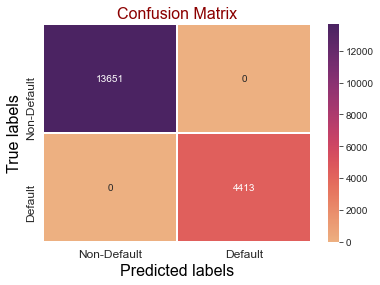

Confusion matrix values
 [[13651     0]
 [    0  4413]]


Classification Report
               precision    recall  f1-score   support

           0      1.000     1.000     1.000     13651
           1      1.000     1.000     1.000      4413

    accuracy                          1.000     18064
   macro avg      1.000     1.000     1.000     18064
weighted avg      1.000     1.000     1.000     18064



ROC_AUC score : 100.0%


In [67]:
# plotting confusion matrix,classification report and roc_auc score for train dataset

# confusion matrix
cm_joint_xg=metrics.confusion_matrix(joint_y_train,y_pred_jnt_xg)

ax= plt.subplot()
sns.heatmap(cm_joint_xg, annot=True, fmt='g', ax=ax,cmap='flare',linewidth=0.5);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels',fontdict={'color': 'black','weight': 'normal','size': 16 })
ax.set_ylabel('True labels',fontdict={'color': 'black','weight': 'normal','size': 16 }) 
ax.set_title('Confusion Matrix',fontdict={'color': 'darkred','weight': 'normal','size': 16 }) 
ax.xaxis.set_ticklabels(['Non-Default', 'Default'])
ax.yaxis.set_ticklabels(['Non-Default','Default'])
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.show()

print('\033[1m'+"Confusion matrix values\n"+'\033[0m',cm_joint_xg)

# classification report
print('\033[1m'+"\n\nClassification Report\n"+'\033[0m',metrics.classification_report(joint_y_train,y_pred_jnt_xg,digits=3))

# roc_auc score
auc_score=round(roc_auc_score(joint_y_train,y_pred_jnt_xg)*100,3)
print('\033[1m'+"\n\nROC_AUC score : "+'\033[0m'+'{}%'.format(auc_score))

#### evaluating the test dataset

In [68]:
# prediction for test dataset
y_pred_jnt_test_xg=xg_clf_jnt.predict(joint_X_test)

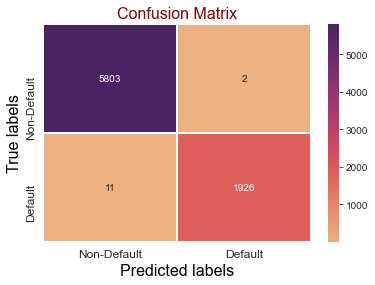

Confusion matrix values
 [[5803    2]
 [  11 1926]]


Classification Report
               precision    recall  f1-score   support

           0      0.998     1.000     0.999      5805
           1      0.999     0.994     0.997      1937

    accuracy                          0.998      7742
   macro avg      0.999     0.997     0.998      7742
weighted avg      0.998     0.998     0.998      7742



ROC_AUC score : 99.699%


In [69]:
# plotting confusion matrix,classification report and roc_auc score for train dataset

# confusion matrix
cm_test_joint_xg=metrics.confusion_matrix(joint_y_test,y_pred_jnt_test_xg)

ax= plt.subplot()
sns.heatmap(cm_test_joint_xg, annot=True, fmt='g', ax=ax,cmap='flare',linewidth=0.5);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels',fontdict={'color': 'black','weight': 'normal','size': 16 })
ax.set_ylabel('True labels',fontdict={'color': 'black','weight': 'normal','size': 16 }) 
ax.set_title('Confusion Matrix',fontdict={'color': 'darkred','weight': 'normal','size': 16 }) 
ax.xaxis.set_ticklabels(['Non-Default', 'Default'])
ax.yaxis.set_ticklabels(['Non-Default','Default'])
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.show()

print('\033[1m'+"Confusion matrix values\n"+'\033[0m',cm_test_joint_xg)

# classification report
print('\033[1m'+"\n\nClassification Report\n"+'\033[0m',metrics.classification_report(joint_y_test,y_pred_jnt_test_xg,digits=3))

# roc_auc score
auc_score_xg=round(roc_auc_score(joint_y_test,y_pred_jnt_test_xg)*100,3)
print('\033[1m'+"\n\nROC_AUC score : "+'\033[0m'+'{}%'.format(auc_score_xg))

### with hyper parameter tunning

In [92]:
# initializing the classifier
xg_clf_jnt_rcv=XGBClassifier(random_state=100)
# hyper parameter tunning
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}
random_search_jnt_xg=RandomizedSearchCV(xg_clf_jnt_rcv,param_distributions=params,n_iter=5,scoring='roc_auc',
                                 n_jobs=-1,cv=5,verbose=3,random_state=100)

In [93]:
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search_jnt_xg.fit(joint_X_train,joint_y_train)
timer(start_time)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[06:40:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 32.92 seconds.


In [94]:
# checking the best estimator after the tunning
random_search_jnt_xg.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4,
              enable_categorical=False, gamma=0.4, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=3,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=100, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [95]:
# checking the best score
random_search_jnt_xg.best_score_

0.999391525612271

In [96]:
# checking the best parameter value after the tunning
random_search_jnt_xg.best_params_

{'min_child_weight': 7,
 'max_depth': 3,
 'learning_rate': 0.25,
 'gamma': 0.4,
 'colsample_bytree': 0.4}

In [97]:
# intializing the classifier based on best estimator
xg_clf_joint_tunned=random_search_jnt_xg.best_estimator_

# fitting the classifier on train dataset
xg_clf_joint_tunned.fit(joint_X_train,joint_y_train)

[06:40:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4,
              enable_categorical=False, gamma=0.4, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=3,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=100, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [98]:
# predicting the train dataset
y_train_pred_joint_xg_tunned=xg_clf_joint_tunned.predict(joint_X_train)

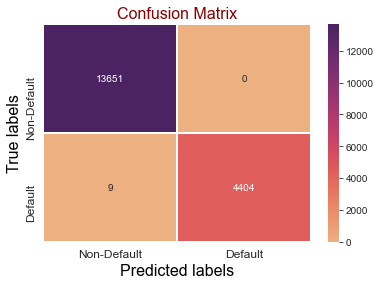

Confusion matrix values
 [[13651     0]
 [    9  4404]]


Classification Report
               precision    recall  f1-score   support

           0      0.999     1.000     1.000     13651
           1      1.000     0.998     0.999      4413

    accuracy                          1.000     18064
   macro avg      1.000     0.999     0.999     18064
weighted avg      1.000     1.000     1.000     18064



ROC_AUC score : 99.898%


In [99]:
# plotting confusion matrix,classification report and roc_auc score for train dataset

# confusion matrix
cm_train_jnt_xg_tunned=metrics.confusion_matrix(joint_y_train,y_train_pred_joint_xg_tunned)

ax= plt.subplot()
sns.heatmap(cm_train_jnt_xg_tunned, annot=True, fmt='g', ax=ax,cmap='flare',linewidth=0.5);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels',fontdict={'color': 'black','weight': 'normal','size': 16 })
ax.set_ylabel('True labels',fontdict={'color': 'black','weight': 'normal','size': 16 }) 
ax.set_title('Confusion Matrix',fontdict={'color': 'darkred','weight': 'normal','size': 16 }) 
ax.xaxis.set_ticklabels(['Non-Default', 'Default'])
ax.yaxis.set_ticklabels(['Non-Default','Default'])
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.show()

print('\033[1m'+"Confusion matrix values\n"+'\033[0m',cm_train_jnt_xg_tunned)

# classification report
print('\033[1m'+"\n\nClassification Report\n"+'\033[0m',metrics.classification_report(joint_y_train,y_train_pred_joint_xg_tunned,digits=3))

# roc_auc score
auc_score_xg=round(roc_auc_score(joint_y_train,y_train_pred_joint_xg_tunned)*100,3)
print('\033[1m'+"\n\nROC_AUC score : "+'\033[0m'+'{}%'.format(auc_score_xg))

#### evaluating the test dataset

In [100]:
# prediction for test dataset
y_test_pred_joint_xg_tunned=xg_clf_joint_tunned.predict(joint_X_test)

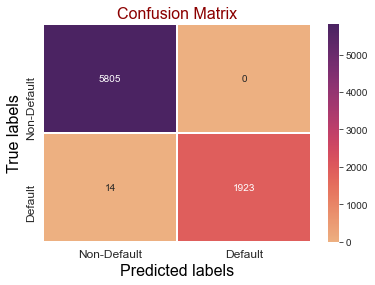

Confusion matrix values
 [[5805    0]
 [  14 1923]]


Classification Report
               precision    recall  f1-score   support

           0      0.998     1.000     0.999      5805
           1      1.000     0.993     0.996      1937

    accuracy                          0.998      7742
   macro avg      0.999     0.996     0.998      7742
weighted avg      0.998     0.998     0.998      7742



ROC_AUC score : 99.639%


In [101]:
# plotting confusion matrix,classification report and roc_auc score for train dataset

# confusion matrix
cm_test_joint_xg_tunned=metrics.confusion_matrix(joint_y_test,y_test_pred_joint_xg_tunned)

ax= plt.subplot()
sns.heatmap(cm_test_joint_xg_tunned, annot=True, fmt='g', ax=ax,cmap='flare',linewidth=0.5);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels',fontdict={'color': 'black','weight': 'normal','size': 16 })
ax.set_ylabel('True labels',fontdict={'color': 'black','weight': 'normal','size': 16 }) 
ax.set_title('Confusion Matrix',fontdict={'color': 'darkred','weight': 'normal','size': 16 }) 
ax.xaxis.set_ticklabels(['Non-Default', 'Default'])
ax.yaxis.set_ticklabels(['Non-Default','Default'])
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.show()

print('\033[1m'+"Confusion matrix values\n"+'\033[0m',cm_test_joint_xg_tunned)

# classification report
print('\033[1m'+"\n\nClassification Report\n"+'\033[0m',metrics.classification_report(joint_y_test,y_test_pred_joint_xg_tunned,digits=3))

# roc_auc score
auc_score_xg=round(roc_auc_score(joint_y_test,y_test_pred_joint_xg_tunned)*100,3)
print('\033[1m'+"\n\nROC_AUC score : "+'\033[0m'+'{}%'.format(auc_score_xg))

### Explainability of the result

In [70]:
# compiling the test dataset
start_time = timer(None) # timer starts

xpl_jnt_xg = SmartExplainer()
xpl_jnt_xg.compile(
    x=joint_X_test,
    model=xg_clf_jnt,
   
)

timer(start_time)   # timer ends

Backend: Shap TreeExplainer

 Time taken: 0 hours 0 minutes and 0.67 seconds.


In [71]:
# converting the test prediction from array to series and reindexing the output result as per original indexing
y_test_pred_jnt_xg=pd.Series(y_pred_jnt_test_xg)
y_test_pred_jnt_xg.index=joint_y_test.index
y_test_pred_jnt_xg.head()

6721     0
12582    0
19905    0
13375    0
1284     0
dtype: int64

In [72]:
# finidng the contribution of the features

start_time = timer(None) # start time

predictor_jnt_xg = xpl_jnt_xg.to_smartpredictor()
predictor_jnt_xg.add_input(x=joint_X_test, ypred=y_test_pred_jnt_xg)
detailed_contributions_jnt_xg = predictor_jnt_xg.detail_contributions()


timer(start_time)   # end time


 Time taken: 0 hours 0 minutes and 1.93 seconds.


In [73]:
# top 5 rows of the feature contribution of the prediction result
detailed_contributions_jnt_xg.head()

,ypred,proba,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,title,zip_code,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,annual_inc_joint,dti_joint,verification_status_joint,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,disbursement_method,debt_settlement_flag,avg_fico_range,avg_last_fico_range,sec_avg_last_fico_range
6721,0,0.999729,1.129783,-0.0,0.025552,0.782342,-0.0,0.03439,-0.031617,-0.0,-0.0,-0.184872,-0.0,0.013754,-0.00553,0.032965,-0.006478,-0.003455,0.056371,-0.311188,-0.0,-0.0,-0.045982,-0.024332,-0.000198,-0.0,0.122572,0.175368,0.116903,-0.56616,2.616084,-0.356234,0.050873,-0.041745,-0.0,-0.007967,-0.0,-0.005432,-0.0,-0.0,0.053655,0.137483,-0.297812,-0.0,0.250025,-0.05859,-0.040575,0.111629,-0.068928,0.001542,-0.0,0.045781,0.04288,-0.016412,-0.0,0.043058,0.153909,0.00303,-0.035185,-0.004537,-0.104007,0.019221,-0.0,-0.045488,-0.191326,-0.0,-0.000498,-0.010311,0.031964,-0.013739,-0.0,0.015409,0.134477,-0.038398,-0.014596,0.023088,0.043854,0.106136,-0.007238,-0.033401,-0.0,0.001443,-0.0,-0.005848,-0.011133,0.000443,-0.0,0.01467,0.066821,0.764316,0.191805
12582,0,0.999982,-0.867807,-0.0,0.008607,-0.099361,-0.0,0.045536,0.032669,-0.0,-0.0,0.061822,-0.0,0.040875,-0.004015,0.005872,0.121783,0.014425,0.085412,0.279882,-0.0,-0.0,-0.028309,-0.005736,0.000101,-0.0,0.101383,3.956334,-0.328521,-0.229945,2.886051,0.407032,-0.002988,0.042479,-0.0,-0.007818,-0.0,-0.005432,-0.0,-0.0,0.026135,0.168072,0.149084,-0.0,-0.029871,0.11427,0.008082,-0.127812,-0.046252,-0.003155,-0.0,0.003586,-0.111376,0.268147,-0.0,0.0382,-0.465786,-0.002673,-0.058467,0.02405,0.042818,0.059492,-0.0,0.056108,0.030921,-0.0,0.000371,-0.010351,0.074002,0.033153,-0.0,0.027587,-0.036894,0.067073,-0.001423,0.131727,0.00459,0.056973,-0.016198,-0.014502,-0.0,0.001443,-0.0,0.000658,0.008606,0.000443,-0.0,0.010645,0.022378,0.549742,-0.006306
19905,0,0.999967,-1.049852,-0.0,0.008607,-0.706089,-0.0,0.019942,0.074273,-0.0,-0.0,-0.161917,-0.0,-0.141366,-0.004015,0.006376,0.023551,-0.02415,-0.044961,0.445073,-0.0,-0.0,-0.020857,0.038399,0.000101,-0.0,0.160907,3.579592,0.16596,0.281,2.393323,0.049366,-0.053692,0.040529,-0.0,-0.00567,-0.0,-0.027985,-0.0,-0.0,-0.003157,0.1026,-0.469974,-0.0,0.118472,0.085661,0.008033,-0.022546,-0.065734,-0.003155,-0.0,0.100598,0.121723,-0.046227,-0.0,-0.044902,0.228156,0.004729,0.117628,-0.026123,-0.052339,0.01648,-0.0,0.051065,-0.025904,-0.0,0.000098,-0.132028,0.009324,0.009644,-0.0,0.037082,-0.033982,-0.069425,0.000528,0.060389,-0.055714,0.0333,0.064817,-0.007028,-0.0,0.001443,-0.0,-0.000852,0.017104,-0.003275,-0.0,0.017729,0.003208,1.752312,-0.01509
13375,0,0.999985,-0.260218,-0.0,0.025552,0.464782,-0.0,0.024787,0.007951,-0.0,-0.0,-0.039403,-0.0,0.056031,-0.00553,0.006534,0.279516,0.028693,0.071658,-0.284393,-0.0,-0.0,-0.028309,-0.009811,0.000101,-0.0,0.116023,2.746409,-0.068554,-0.292386,2.653097,0.255392,0.012003,-0.030355,-0.0,-0.003305,-0.0,0.005584,-0.0,-0.0,0.022745,0.151107,0.157481,-0.0,-0.008909,0.088677,-0.005746,-0.134015,-0.086468,-0.003155,-0.0,0.044198,0.130355,-0.027

In [74]:
# top 5 feature contribution to the prediction result

start_time = timer(None) # start time

predictor_jnt_xg.modify_mask(max_contrib=5)
explanation_jnt_xg = predictor_jnt_xg.summarize()

timer(start_time)   # end time


 Time taken: 0 hours 0 minutes and 1.93 seconds.


In [75]:
# top 5 rows of the prediction result with top 5 contribution features
explanation_jnt_xg.head()

,ypred,proba,feature_1,value_1,contribution_1,feature_2,value_2,contribution_2,feature_3,value_3,contribution_3,feature_4,value_4,contribution_4,feature_5,value_5,contribution_5
6721,0,0.999729,last_pymnt_amnt,-0.512668,2.616084,loan_amnt,-1.151138,1.129783,installment,-0.988792,0.782342,avg_last_fico_range,-0.003062,0.764316,last_pymnt_d,102018.0,-0.56616
12582,0,0.999982,total_rec_prncp,0.865899,3.956334,last_pymnt_amnt,0.503974,2.886051,loan_amnt,0.571947,-0.867807,avg_last_fico_range,-0.26833,0.549742,mo_sin_old_rev_tl_op,0.609537,-0.465786
19905,0,0.999967,total_rec_prncp,2.176909,3.579592,last_pymnt_amnt,2.79701,2.393323,avg_last_fico_range,0.461157,1.752312,loan_amnt,2.026027,-1.049852,installment,1.237289,-0.706089
13375,0,0.999985,total_rec_prncp,0.428895,2.746409,last_pymnt_amnt,0.126667,2.653097,avg_last_fico_range,0.39484,1.622627,installment,-0.34296,0.464782,last_pymnt_d,102018.0,-0.292386
1284,0,0.999979,last_pymnt_amnt,0.196311,3.263448,total_rec_prncp,-0.008108,1.608366,avg_last_fico_range,0.262206,0.865021,loan_amnt,-0.39744,0.350824,mo_sin_old_rev_tl_op,-0.956221,0.323326


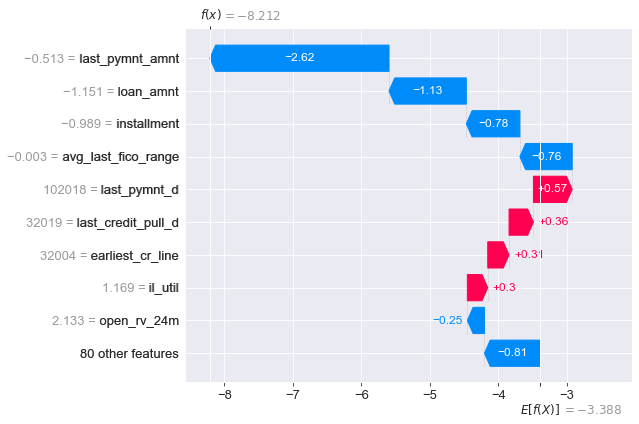


 Time taken: 0 hours 0 minutes and 1.34 seconds.


In [76]:
# plotting the first prediction's explanation using shap waterfall plot

start_time = timer(None) # timing starts from this point for "start_time" variable

explainer_jnt_xg = shap.Explainer(xg_clf_jnt)
shap_values_jnt_xg = explainer_jnt_xg(joint_X_test)
#shap.summary_plot(shap_values, individual_X_test, plot_type="bar")
shap.plots.waterfall(shap_values_jnt_xg[0])

timer(start_time)   # end time

In [77]:
# plotting the first prediction's explanation with a force plot
shap.initjs()
shap.plots.force(shap_values_jnt_xg[0])

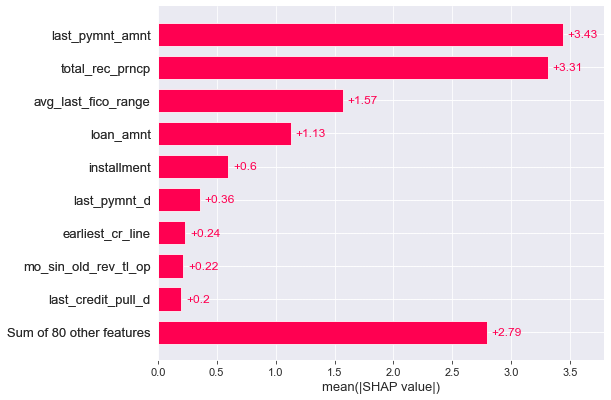

In [28]:
shap.plots.bar(shap_values_jnt_xg)

### LightGBM model

### without hyperparameter tunning

In [110]:
# initializing the classifier
lg_jnt_clf=LGBMClassifier(random_state=100)

# fitting the classifier on train dataset
lg_jnt_clf.fit(joint_X_train,joint_y_train)

LGBMClassifier(random_state=100)

In [111]:
# prediction for train dataset
y_pred_train_jnt_lg=lg_jnt_clf.predict(joint_X_train)

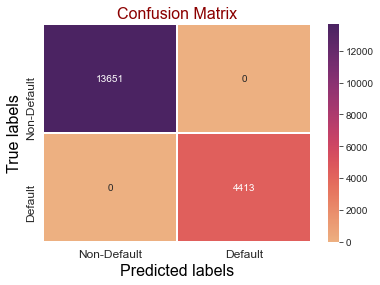

Confusion matrix values
 [[13651     0]
 [    0  4413]]


Classification Report
               precision    recall  f1-score   support

           0      1.000     1.000     1.000     13651
           1      1.000     1.000     1.000      4413

    accuracy                          1.000     18064
   macro avg      1.000     1.000     1.000     18064
weighted avg      1.000     1.000     1.000     18064



ROC_AUC score : 100.0%


In [112]:
# plotting confusion matrix,classification report and roc_auc score for train dataset

# confusion matrix
cm_train_jnt_lg=metrics.confusion_matrix(joint_y_train,y_pred_train_jnt_lg)

ax= plt.subplot()
sns.heatmap(cm_train_jnt_lg, annot=True, fmt='g', ax=ax,cmap='flare',linewidth=0.5);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels',fontdict={'color': 'black','weight': 'normal','size': 16 })
ax.set_ylabel('True labels',fontdict={'color': 'black','weight': 'normal','size': 16 }) 
ax.set_title('Confusion Matrix',fontdict={'color': 'darkred','weight': 'normal','size': 16 }) 
ax.xaxis.set_ticklabels(['Non-Default', 'Default'])
ax.yaxis.set_ticklabels(['Non-Default','Default'])
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.show()

print('\033[1m'+"Confusion matrix values\n"+'\033[0m',cm_train_jnt_lg)

# classification report
print('\033[1m'+"\n\nClassification Report\n"+'\033[0m',metrics.classification_report(joint_y_train,y_pred_train_jnt_lg,digits=3))

# roc_auc score
auc_score=round(roc_auc_score(joint_y_train,y_pred_train_jnt_lg)*100,3)
print('\033[1m'+"\n\nROC_AUC score : "+'\033[0m'+'{}%'.format(auc_score))

#### Evaluating the test dataset

In [113]:
# prediction for test dataset
y_pred_test_jnt_lg=lg_jnt_clf.predict(joint_X_test)

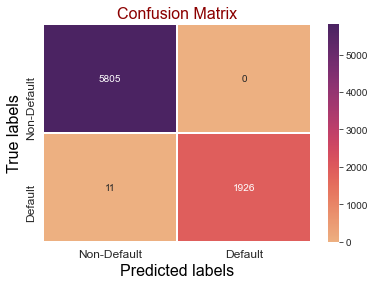

Confusion matrix values
 [[5805    0]
 [  11 1926]]


Classification Report
               precision    recall  f1-score   support

           0      0.998     1.000     0.999      5805
           1      1.000     0.994     0.997      1937

    accuracy                          0.999      7742
   macro avg      0.999     0.997     0.998      7742
weighted avg      0.999     0.999     0.999      7742



ROC_AUC score : 99.716%


In [114]:
# plotting confusion matrix,classification report and roc_auc score for train dataset

# confusion matrix
cm_test_jnt_lg=metrics.confusion_matrix(joint_y_test,y_pred_test_jnt_lg)

ax= plt.subplot()
sns.heatmap(cm_test_jnt_lg, annot=True, fmt='g', ax=ax,cmap='flare',linewidth=0.5);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels',fontdict={'color': 'black','weight': 'normal','size': 16 })
ax.set_ylabel('True labels',fontdict={'color': 'black','weight': 'normal','size': 16 }) 
ax.set_title('Confusion Matrix',fontdict={'color': 'darkred','weight': 'normal','size': 16 }) 
ax.xaxis.set_ticklabels(['Non-Default', 'Default'])
ax.yaxis.set_ticklabels(['Non-Default','Default'])
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.show()

print('\033[1m'+"Confusion matrix values\n"+'\033[0m',cm_test_jnt_lg)

# classification report
print('\033[1m'+"\n\nClassification Report\n"+'\033[0m',metrics.classification_report(joint_y_test,y_pred_test_jnt_lg,digits=3))

# roc_auc score
auc_score=round(roc_auc_score(joint_y_test,y_pred_test_jnt_lg)*100,3)
print('\033[1m'+"\n\nROC_AUC score : "+'\033[0m'+'{}%'.format(auc_score))

### With Hyperparameter tunning

In [115]:
# defining the various parameter values
params ={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

# initializing the classifier
lgb_clf_jnt_rcv=LGBMClassifier(random_state=100)

# initializing the randomsearchcv 
random_search_lgbm_jnt=RandomizedSearchCV(lgb_clf_jnt_rcv,param_distributions=params,n_iter=5,scoring='roc_auc',
                                 n_jobs=-1,cv=5,verbose=3)

In [116]:
# fitting the model for tunning
start_time = timer(None)
random_search_lgbm_jnt.fit(joint_X_train,joint_y_train)
timer(start_time)

Fitting 5 folds for each of 5 candidates, totalling 25 fits

 Time taken: 0 hours 0 minutes and 8.01 seconds.


In [117]:
# checking the best estimator after the tunning
random_search_lgbm_jnt.best_estimator_

LGBMClassifier(colsample_bytree=0.4927269428466519, min_child_samples=206,
               num_leaves=32, random_state=100, reg_alpha=2, reg_lambda=10,
               subsample=0.25029210963427917)

In [118]:
# checking the best score
random_search_lgbm_jnt.best_score_

0.9993359553670838

In [119]:
# initializing the classifier based on the best estimator
lgbm_clf_joint_tunned=random_search_lgbm_jnt.best_estimator_

# fitting the classifier on train dataset
lgbm_clf_joint_tunned.fit(joint_X_train,joint_y_train)

LGBMClassifier(colsample_bytree=0.4927269428466519, min_child_samples=206,
               num_leaves=32, random_state=100, reg_alpha=2, reg_lambda=10,
               subsample=0.25029210963427917)

In [120]:
# prediction for train dataset 
y_pred_train_jnt_tunned_lg=lgbm_clf_joint_tunned.predict(joint_X_train)

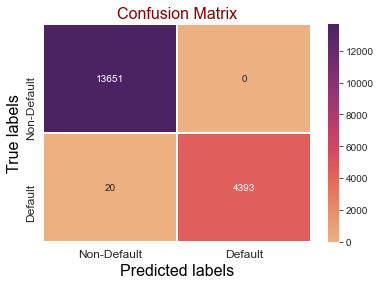

Confusion matrix values
 [[13651     0]
 [   20  4393]]


Classification Report
               precision    recall  f1-score   support

           0      0.999     1.000     0.999     13651
           1      1.000     0.995     0.998      4413

    accuracy                          0.999     18064
   macro avg      0.999     0.998     0.998     18064
weighted avg      0.999     0.999     0.999     18064



ROC_AUC score : 99.773%


In [121]:
# plotting confusion matrix,classification report and roc_auc score for train dataset

# confusion matrix
cm_train_jnt_lg_tunned=metrics.confusion_matrix(joint_y_train,y_pred_train_jnt_tunned_lg)

ax= plt.subplot()
sns.heatmap(cm_train_jnt_lg_tunned, annot=True, fmt='g', ax=ax,cmap='flare',linewidth=0.5);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels',fontdict={'color': 'black','weight': 'normal','size': 16 })
ax.set_ylabel('True labels',fontdict={'color': 'black','weight': 'normal','size': 16 }) 
ax.set_title('Confusion Matrix',fontdict={'color': 'darkred','weight': 'normal','size': 16 }) 
ax.xaxis.set_ticklabels(['Non-Default', 'Default'])
ax.yaxis.set_ticklabels(['Non-Default','Default'])
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.show()

print('\033[1m'+"Confusion matrix values\n"+'\033[0m',cm_train_jnt_lg_tunned)

# classification report
print('\033[1m'+"\n\nClassification Report\n"+'\033[0m',metrics.classification_report(joint_y_train,y_pred_train_jnt_tunned_lg,digits=3))

# roc_auc score
auc_score=round(roc_auc_score(joint_y_train,y_pred_train_jnt_tunned_lg)*100,3)
print('\033[1m'+"\n\nROC_AUC score : "+'\033[0m'+'{}%'.format(auc_score))

#### Evaluating the test dataset

In [122]:
# prediction for test dataset 
y_pred_test_jnt_tunned_lg=lgbm_clf_joint_tunned.predict(joint_X_test)

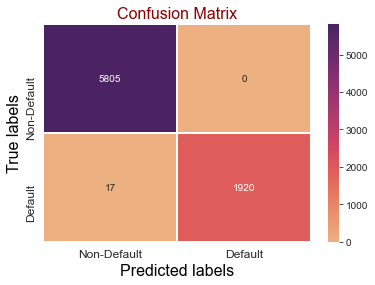

Confusion matrix values
 [[5805    0]
 [  17 1920]]


Classification Report
               precision    recall  f1-score   support

           0      0.997     1.000     0.999      5805
           1      1.000     0.991     0.996      1937

    accuracy                          0.998      7742
   macro avg      0.999     0.996     0.997      7742
weighted avg      0.998     0.998     0.998      7742



ROC_AUC score : 99.561%


In [123]:
# plotting confusion matrix,classification report and roc_auc score for train dataset

# confusion matrix
cm_test_jnt_lg_tunned=metrics.confusion_matrix(joint_y_test,y_pred_test_jnt_tunned_lg)

ax= plt.subplot()
sns.heatmap(cm_test_jnt_lg_tunned, annot=True, fmt='g', ax=ax,cmap='flare',linewidth=0.5);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels',fontdict={'color': 'black','weight': 'normal','size': 16 })
ax.set_ylabel('True labels',fontdict={'color': 'black','weight': 'normal','size': 16 }) 
ax.set_title('Confusion Matrix',fontdict={'color': 'darkred','weight': 'normal','size': 16 }) 
ax.xaxis.set_ticklabels(['Non-Default', 'Default'])
ax.yaxis.set_ticklabels(['Non-Default','Default'])
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.show()

print('\033[1m'+"Confusion matrix values\n"+'\033[0m',cm_test_jnt_lg_tunned)

# classification report
print('\033[1m'+"\n\nClassification Report\n"+'\033[0m',metrics.classification_report(joint_y_test,y_pred_test_jnt_tunned_lg,digits=3))

# roc_auc score
auc_score=round(roc_auc_score(joint_y_test,y_pred_test_jnt_tunned_lg)*100,3)
print('\033[1m'+"\n\nROC_AUC score : "+'\033[0m'+'{}%'.format(auc_score))

### CatBoost

### Without hyper parameter tunning

In [78]:
# initializing the classifier
cat_clf_joint=CatBoostClassifier(random_state=100)

# fitting the model
cat_clf_joint.fit(joint_X_train,joint_y_train)

Learning rate set to 0.035448
0:	learn: 0.5985730	total: 16.8ms	remaining: 16.7s
1:	learn: 0.5152024	total: 28.4ms	remaining: 14.2s
2:	learn: 0.4346715	total: 42.1ms	remaining: 14s
3:	learn: 0.3710862	total: 56.9ms	remaining: 14.2s
4:	learn: 0.3137999	total: 67.5ms	remaining: 13.4s
5:	learn: 0.2683706	total: 79.9ms	remaining: 13.2s
6:	learn: 0.2315991	total: 93.1ms	remaining: 13.2s
7:	learn: 0.2021389	total: 106ms	remaining: 13.1s
8:	learn: 0.1770241	total: 119ms	remaining: 13.1s
9:	learn: 0.1547992	total: 132ms	remaining: 13.1s
10:	learn: 0.1354995	total: 146ms	remaining: 13.1s
11:	learn: 0.1214451	total: 159ms	remaining: 13.1s
12:	learn: 0.1084349	total: 170ms	remaining: 12.9s
13:	learn: 0.0979202	total: 188ms	remaining: 13.3s
14:	learn: 0.0884227	total: 202ms	remaining: 13.2s
15:	learn: 0.0815477	total: 213ms	remaining: 13.1s
16:	learn: 0.0742380	total: 223ms	remaining: 12.9s
17:	learn: 0.0675055	total: 237ms	remaining: 12.9s
18:	learn: 0.0620772	total: 249ms	remaining: 12.9s
19:	le

175:	learn: 0.0058127	total: 2.62s	remaining: 12.3s
176:	learn: 0.0057993	total: 2.63s	remaining: 12.2s
177:	learn: 0.0057889	total: 2.66s	remaining: 12.3s
178:	learn: 0.0057550	total: 2.67s	remaining: 12.3s
179:	learn: 0.0057428	total: 2.69s	remaining: 12.2s
180:	learn: 0.0057132	total: 2.7s	remaining: 12.2s
181:	learn: 0.0057039	total: 2.71s	remaining: 12.2s
182:	learn: 0.0056646	total: 2.72s	remaining: 12.2s
183:	learn: 0.0056567	total: 2.74s	remaining: 12.1s
184:	learn: 0.0056477	total: 2.75s	remaining: 12.1s
185:	learn: 0.0056212	total: 2.76s	remaining: 12.1s
186:	learn: 0.0056081	total: 2.77s	remaining: 12s
187:	learn: 0.0055974	total: 2.78s	remaining: 12s
188:	learn: 0.0055730	total: 2.79s	remaining: 12s
189:	learn: 0.0055640	total: 2.81s	remaining: 12s
190:	learn: 0.0055543	total: 2.82s	remaining: 12s
191:	learn: 0.0055413	total: 2.83s	remaining: 11.9s
192:	learn: 0.0055313	total: 2.84s	remaining: 11.9s
193:	learn: 0.0055142	total: 2.85s	remaining: 11.9s
194:	learn: 0.0055092	t

338:	learn: 0.0033952	total: 4.8s	remaining: 9.36s
339:	learn: 0.0033849	total: 4.81s	remaining: 9.34s
340:	learn: 0.0033637	total: 4.83s	remaining: 9.33s
341:	learn: 0.0033598	total: 4.84s	remaining: 9.31s
342:	learn: 0.0033388	total: 4.85s	remaining: 9.29s
343:	learn: 0.0033310	total: 4.86s	remaining: 9.27s
344:	learn: 0.0033281	total: 4.87s	remaining: 9.25s
345:	learn: 0.0033036	total: 4.88s	remaining: 9.23s
346:	learn: 0.0032921	total: 4.89s	remaining: 9.21s
347:	learn: 0.0032846	total: 4.9s	remaining: 9.19s
348:	learn: 0.0032736	total: 4.91s	remaining: 9.17s
349:	learn: 0.0032538	total: 4.93s	remaining: 9.15s
350:	learn: 0.0032332	total: 4.94s	remaining: 9.13s
351:	learn: 0.0032245	total: 4.95s	remaining: 9.12s
352:	learn: 0.0032245	total: 4.96s	remaining: 9.1s
353:	learn: 0.0032232	total: 4.97s	remaining: 9.08s
354:	learn: 0.0032232	total: 4.98s	remaining: 9.05s
355:	learn: 0.0032197	total: 5s	remaining: 9.04s
356:	learn: 0.0031835	total: 5.01s	remaining: 9.02s
357:	learn: 0.0031

513:	learn: 0.0021175	total: 6.89s	remaining: 6.51s
514:	learn: 0.0021108	total: 6.9s	remaining: 6.5s
515:	learn: 0.0021065	total: 6.91s	remaining: 6.48s
516:	learn: 0.0021005	total: 6.92s	remaining: 6.47s
517:	learn: 0.0020974	total: 6.93s	remaining: 6.45s
518:	learn: 0.0020964	total: 6.95s	remaining: 6.44s
519:	learn: 0.0020964	total: 6.96s	remaining: 6.42s
520:	learn: 0.0020920	total: 6.97s	remaining: 6.4s
521:	learn: 0.0020879	total: 6.98s	remaining: 6.39s
522:	learn: 0.0020830	total: 6.99s	remaining: 6.37s
523:	learn: 0.0020772	total: 7s	remaining: 6.36s
524:	learn: 0.0020675	total: 7.01s	remaining: 6.35s
525:	learn: 0.0020628	total: 7.03s	remaining: 6.33s
526:	learn: 0.0020628	total: 7.04s	remaining: 6.32s
527:	learn: 0.0020597	total: 7.05s	remaining: 6.3s
528:	learn: 0.0020540	total: 7.06s	remaining: 6.29s
529:	learn: 0.0020540	total: 7.08s	remaining: 6.28s
530:	learn: 0.0020540	total: 7.1s	remaining: 6.27s
531:	learn: 0.0020498	total: 7.11s	remaining: 6.25s
532:	learn: 0.002049

679:	learn: 0.0016879	total: 8.86s	remaining: 4.17s
680:	learn: 0.0016879	total: 8.87s	remaining: 4.15s
681:	learn: 0.0016879	total: 8.88s	remaining: 4.14s
682:	learn: 0.0016879	total: 8.89s	remaining: 4.13s
683:	learn: 0.0016879	total: 8.9s	remaining: 4.11s
684:	learn: 0.0016879	total: 8.91s	remaining: 4.09s
685:	learn: 0.0016879	total: 8.92s	remaining: 4.08s
686:	learn: 0.0016853	total: 8.93s	remaining: 4.07s
687:	learn: 0.0016853	total: 8.94s	remaining: 4.05s
688:	learn: 0.0016853	total: 8.95s	remaining: 4.04s
689:	learn: 0.0016852	total: 8.96s	remaining: 4.02s
690:	learn: 0.0016852	total: 8.97s	remaining: 4.01s
691:	learn: 0.0016852	total: 8.98s	remaining: 4s
692:	learn: 0.0016852	total: 8.99s	remaining: 3.98s
693:	learn: 0.0016852	total: 9s	remaining: 3.97s
694:	learn: 0.0016852	total: 9.01s	remaining: 3.95s
695:	learn: 0.0016852	total: 9.02s	remaining: 3.94s
696:	learn: 0.0016852	total: 9.03s	remaining: 3.92s
697:	learn: 0.0016852	total: 9.04s	remaining: 3.91s
698:	learn: 0.00168

841:	learn: 0.0016674	total: 10.6s	remaining: 1.99s
842:	learn: 0.0016674	total: 10.6s	remaining: 1.98s
843:	learn: 0.0016674	total: 10.6s	remaining: 1.96s
844:	learn: 0.0016674	total: 10.6s	remaining: 1.95s
845:	learn: 0.0016674	total: 10.6s	remaining: 1.94s
846:	learn: 0.0016674	total: 10.7s	remaining: 1.92s
847:	learn: 0.0016674	total: 10.7s	remaining: 1.91s
848:	learn: 0.0016674	total: 10.7s	remaining: 1.9s
849:	learn: 0.0016674	total: 10.7s	remaining: 1.89s
850:	learn: 0.0016674	total: 10.7s	remaining: 1.87s
851:	learn: 0.0016674	total: 10.7s	remaining: 1.86s
852:	learn: 0.0016674	total: 10.7s	remaining: 1.84s
853:	learn: 0.0016674	total: 10.7s	remaining: 1.83s
854:	learn: 0.0016674	total: 10.7s	remaining: 1.82s
855:	learn: 0.0016673	total: 10.7s	remaining: 1.81s
856:	learn: 0.0016673	total: 10.8s	remaining: 1.79s
857:	learn: 0.0016673	total: 10.8s	remaining: 1.78s
858:	learn: 0.0016673	total: 10.8s	remaining: 1.77s
859:	learn: 0.0016673	total: 10.8s	remaining: 1.75s
860:	learn: 0

In [79]:
# prediction of train dataset
y_pred_train_joint_cat=cat_clf_joint.predict(joint_X_train)

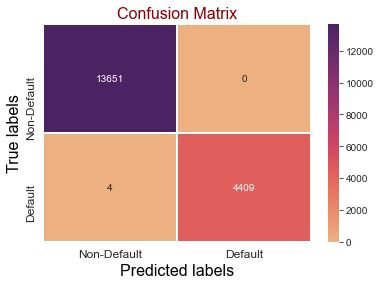

Confusion matrix values
 [[13651     0]
 [    4  4409]]


Classification Report
               precision    recall  f1-score   support

           0      1.000     1.000     1.000     13651
           1      1.000     0.999     1.000      4413

    accuracy                          1.000     18064
   macro avg      1.000     1.000     1.000     18064
weighted avg      1.000     1.000     1.000     18064



ROC_AUC score : 99.955%


In [80]:
# plotting confusion matrix,classification report and roc_auc score for train dataset

# confusion matrix
cm_train_joint_cat=metrics.confusion_matrix(joint_y_train,y_pred_train_joint_cat)

ax= plt.subplot()
sns.heatmap(cm_train_joint_cat, annot=True, fmt='g', ax=ax,cmap='flare',linewidth=0.5);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels',fontdict={'color': 'black','weight': 'normal','size': 16 })
ax.set_ylabel('True labels',fontdict={'color': 'black','weight': 'normal','size': 16 }) 
ax.set_title('Confusion Matrix',fontdict={'color': 'darkred','weight': 'normal','size': 16 }) 
ax.xaxis.set_ticklabels(['Non-Default', 'Default'])
ax.yaxis.set_ticklabels(['Non-Default','Default'])
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.show()

print('\033[1m'+"Confusion matrix values\n"+'\033[0m',cm_train_joint_cat)

# classification report
print('\033[1m'+"\n\nClassification Report\n"+'\033[0m',metrics.classification_report(joint_y_train,y_pred_train_joint_cat,digits=3))

# roc_auc score
auc_score_xg=round(roc_auc_score(joint_y_train,y_pred_train_joint_cat)*100,3)
print('\033[1m'+"\n\nROC_AUC score : "+'\033[0m'+'{}%'.format(auc_score_xg))

#### Evaluating the test dataset

In [81]:
# prediction of test dataset
y_pred_test_joint_cat=cat_clf_joint.predict(joint_X_test)

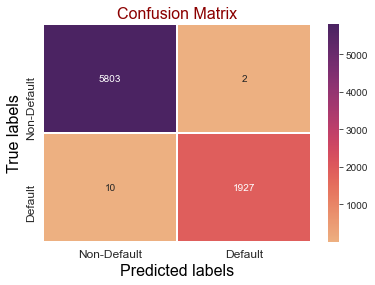

Confusion matrix values
 [[5803    2]
 [  10 1927]]


Classification Report
               precision    recall  f1-score   support

           0      0.998     1.000     0.999      5805
           1      0.999     0.995     0.997      1937

    accuracy                          0.998      7742
   macro avg      0.999     0.997     0.998      7742
weighted avg      0.998     0.998     0.998      7742



ROC_AUC score : 99.725%


In [82]:
# plotting confusion matrix,classification report and roc_auc score for train dataset

# confusion matrix
cm_test_joint_cat=metrics.confusion_matrix(joint_y_test,y_pred_test_joint_cat)

ax= plt.subplot()
sns.heatmap(cm_test_joint_cat, annot=True, fmt='g', ax=ax,cmap='flare',linewidth=0.5);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels',fontdict={'color': 'black','weight': 'normal','size': 16 })
ax.set_ylabel('True labels',fontdict={'color': 'black','weight': 'normal','size': 16 }) 
ax.set_title('Confusion Matrix',fontdict={'color': 'darkred','weight': 'normal','size': 16 }) 
ax.xaxis.set_ticklabels(['Non-Default', 'Default'])
ax.yaxis.set_ticklabels(['Non-Default','Default'])
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.show()

print('\033[1m'+"Confusion matrix values\n"+'\033[0m',cm_test_joint_cat)

# classification report
print('\033[1m'+"\n\nClassification Report\n"+'\033[0m',metrics.classification_report(joint_y_test,y_pred_test_joint_cat,digits=3))

# roc_auc score
auc_score=round(roc_auc_score(joint_y_test,y_pred_test_joint_cat)*100,3)
print('\033[1m'+"\n\nROC_AUC score : "+'\033[0m'+'{}%'.format(auc_score))

### With hyper parameter tunning

In [129]:
# initializing the classifier for tunning
cat_joint_rcv=CatBoostClassifier(random_state=100)

# hyper parameter values for tunning
params = {'depth':[3,1,2,6,4,5,7,8,9,10],
          'iterations':[250,100,500,1000],
          'learning_rate':[0.03,0.001,0.01,0.1,0.2,0.3], 
          'l2_leaf_reg':[3,1,5,10,100],
          'border_count':[32,5,10,20,50,100,200]
          
         }

# initializing the randomsearchcv
random_search_cat_joint=RandomizedSearchCV(cat_joint_rcv,param_distributions=params,n_iter=5,scoring='roc_auc',
                                 n_jobs=-1,cv=5,verbose=3)

In [130]:
# fitting on the train dataset
start_time = timer(None) # timer starts
random_search_cat_joint.fit(joint_X_train,joint_y_train)
timer(start_time)  # timer ends

Fitting 5 folds for each of 5 candidates, totalling 25 fits
0:	learn: 0.6198539	total: 19.8ms	remaining: 9.87s
1:	learn: 0.5555461	total: 28.5ms	remaining: 7.11s
2:	learn: 0.4873551	total: 37.6ms	remaining: 6.23s
3:	learn: 0.4516690	total: 45.7ms	remaining: 5.66s
4:	learn: 0.4048605	total: 54.6ms	remaining: 5.4s
5:	learn: 0.3670561	total: 62.5ms	remaining: 5.14s
6:	learn: 0.3439838	total: 70.4ms	remaining: 4.96s
7:	learn: 0.3134254	total: 79ms	remaining: 4.86s
8:	learn: 0.2930532	total: 86.7ms	remaining: 4.73s
9:	learn: 0.2666050	total: 95ms	remaining: 4.66s
10:	learn: 0.2372668	total: 103ms	remaining: 4.59s
11:	learn: 0.2254185	total: 111ms	remaining: 4.51s
12:	learn: 0.2122700	total: 119ms	remaining: 4.45s
13:	learn: 0.1996650	total: 127ms	remaining: 4.39s
14:	learn: 0.1829281	total: 135ms	remaining: 4.36s
15:	learn: 0.1652881	total: 144ms	remaining: 4.35s
16:	learn: 0.1577835	total: 152ms	remaining: 4.31s
17:	learn: 0.1465158	total: 160ms	remaining: 4.28s
18:	learn: 0.1378688	total:

172:	learn: 0.0104485	total: 1.38s	remaining: 2.6s
173:	learn: 0.0103780	total: 1.38s	remaining: 2.59s
174:	learn: 0.0103339	total: 1.39s	remaining: 2.58s
175:	learn: 0.0102811	total: 1.4s	remaining: 2.57s
176:	learn: 0.0102700	total: 1.41s	remaining: 2.57s
177:	learn: 0.0101976	total: 1.41s	remaining: 2.56s
178:	learn: 0.0101495	total: 1.42s	remaining: 2.55s
179:	learn: 0.0100486	total: 1.43s	remaining: 2.54s
180:	learn: 0.0100176	total: 1.44s	remaining: 2.54s
181:	learn: 0.0099849	total: 1.45s	remaining: 2.53s
182:	learn: 0.0099645	total: 1.45s	remaining: 2.52s
183:	learn: 0.0099407	total: 1.46s	remaining: 2.51s
184:	learn: 0.0099308	total: 1.47s	remaining: 2.5s
185:	learn: 0.0098186	total: 1.48s	remaining: 2.49s
186:	learn: 0.0098075	total: 1.48s	remaining: 2.48s
187:	learn: 0.0097928	total: 1.49s	remaining: 2.47s
188:	learn: 0.0097782	total: 1.5s	remaining: 2.46s
189:	learn: 0.0097656	total: 1.5s	remaining: 2.46s
190:	learn: 0.0096679	total: 1.51s	remaining: 2.45s
191:	learn: 0.009

343:	learn: 0.0066720	total: 2.69s	remaining: 1.22s
344:	learn: 0.0066618	total: 2.7s	remaining: 1.21s
345:	learn: 0.0066539	total: 2.71s	remaining: 1.21s
346:	learn: 0.0066311	total: 2.71s	remaining: 1.2s
347:	learn: 0.0066163	total: 2.72s	remaining: 1.19s
348:	learn: 0.0066004	total: 2.73s	remaining: 1.18s
349:	learn: 0.0065866	total: 2.74s	remaining: 1.17s
350:	learn: 0.0065776	total: 2.74s	remaining: 1.17s
351:	learn: 0.0065686	total: 2.75s	remaining: 1.16s
352:	learn: 0.0065496	total: 2.76s	remaining: 1.15s
353:	learn: 0.0065284	total: 2.77s	remaining: 1.14s
354:	learn: 0.0065201	total: 2.77s	remaining: 1.13s
355:	learn: 0.0065125	total: 2.78s	remaining: 1.13s
356:	learn: 0.0065056	total: 2.79s	remaining: 1.12s
357:	learn: 0.0064975	total: 2.8s	remaining: 1.11s
358:	learn: 0.0064755	total: 2.8s	remaining: 1.1s
359:	learn: 0.0064721	total: 2.81s	remaining: 1.09s
360:	learn: 0.0064572	total: 2.82s	remaining: 1.08s
361:	learn: 0.0064468	total: 2.83s	remaining: 1.08s
362:	learn: 0.006

In [131]:
# checking the best estimator after tunning
random_search_cat_joint.best_estimator_

In [132]:
# checking the best score after the tunning
random_search_cat_joint.best_score_

0.9993868641321513

In [133]:
# checking the best parameter value after the tunning
random_search_cat_joint.best_params_

{'learning_rate': 0.03,
 'l2_leaf_reg': 3,
 'iterations': 500,
 'depth': 4,
 'border_count': 32}

In [134]:
# initializing the classifier based on best estimator
cat_clf_joint_tunned=random_search_cat_joint.best_estimator_

# fitting the classifier on the train dataset
cat_clf_joint_tunned.fit(joint_X_train,joint_y_train)

0:	learn: 0.6198539	total: 7.37ms	remaining: 3.68s
1:	learn: 0.5555461	total: 15ms	remaining: 3.74s
2:	learn: 0.4873551	total: 23.1ms	remaining: 3.83s
3:	learn: 0.4516690	total: 30.1ms	remaining: 3.73s
4:	learn: 0.4048605	total: 38ms	remaining: 3.76s
5:	learn: 0.3670561	total: 45.7ms	remaining: 3.76s
6:	learn: 0.3439838	total: 53ms	remaining: 3.73s
7:	learn: 0.3134254	total: 60.5ms	remaining: 3.72s
8:	learn: 0.2930532	total: 67.9ms	remaining: 3.7s
9:	learn: 0.2666050	total: 75.7ms	remaining: 3.71s
10:	learn: 0.2372668	total: 84ms	remaining: 3.73s
11:	learn: 0.2254185	total: 91.4ms	remaining: 3.72s
12:	learn: 0.2122700	total: 98.5ms	remaining: 3.69s
13:	learn: 0.1996650	total: 106ms	remaining: 3.69s
14:	learn: 0.1829281	total: 114ms	remaining: 3.69s
15:	learn: 0.1652881	total: 123ms	remaining: 3.71s
16:	learn: 0.1577835	total: 130ms	remaining: 3.69s
17:	learn: 0.1465158	total: 137ms	remaining: 3.67s
18:	learn: 0.1378688	total: 144ms	remaining: 3.65s
19:	learn: 0.1299594	total: 152ms	rem

164:	learn: 0.0109997	total: 1.34s	remaining: 2.71s
165:	learn: 0.0109511	total: 1.35s	remaining: 2.71s
166:	learn: 0.0108544	total: 1.35s	remaining: 2.7s
167:	learn: 0.0108160	total: 1.36s	remaining: 2.69s
168:	learn: 0.0107896	total: 1.37s	remaining: 2.69s
169:	learn: 0.0107201	total: 1.38s	remaining: 2.68s
170:	learn: 0.0105938	total: 1.39s	remaining: 2.67s
171:	learn: 0.0105715	total: 1.4s	remaining: 2.67s
172:	learn: 0.0104485	total: 1.41s	remaining: 2.66s
173:	learn: 0.0103780	total: 1.42s	remaining: 2.65s
174:	learn: 0.0103339	total: 1.42s	remaining: 2.65s
175:	learn: 0.0102811	total: 1.43s	remaining: 2.64s
176:	learn: 0.0102700	total: 1.44s	remaining: 2.63s
177:	learn: 0.0101976	total: 1.45s	remaining: 2.62s
178:	learn: 0.0101495	total: 1.46s	remaining: 2.61s
179:	learn: 0.0100486	total: 1.47s	remaining: 2.61s
180:	learn: 0.0100176	total: 1.48s	remaining: 2.6s
181:	learn: 0.0099849	total: 1.49s	remaining: 2.59s
182:	learn: 0.0099645	total: 1.49s	remaining: 2.58s
183:	learn: 0.0

338:	learn: 0.0067394	total: 2.67s	remaining: 1.26s
339:	learn: 0.0067259	total: 2.67s	remaining: 1.26s
340:	learn: 0.0067103	total: 2.68s	remaining: 1.25s
341:	learn: 0.0067035	total: 2.68s	remaining: 1.24s
342:	learn: 0.0066928	total: 2.69s	remaining: 1.23s
343:	learn: 0.0066720	total: 2.7s	remaining: 1.22s
344:	learn: 0.0066618	total: 2.7s	remaining: 1.21s
345:	learn: 0.0066539	total: 2.71s	remaining: 1.21s
346:	learn: 0.0066311	total: 2.72s	remaining: 1.2s
347:	learn: 0.0066163	total: 2.72s	remaining: 1.19s
348:	learn: 0.0066004	total: 2.73s	remaining: 1.18s
349:	learn: 0.0065866	total: 2.74s	remaining: 1.17s
350:	learn: 0.0065776	total: 2.75s	remaining: 1.17s
351:	learn: 0.0065686	total: 2.75s	remaining: 1.16s
352:	learn: 0.0065496	total: 2.76s	remaining: 1.15s
353:	learn: 0.0065284	total: 2.77s	remaining: 1.14s
354:	learn: 0.0065201	total: 2.77s	remaining: 1.13s
355:	learn: 0.0065125	total: 2.78s	remaining: 1.12s
356:	learn: 0.0065056	total: 2.79s	remaining: 1.12s
357:	learn: 0.0

In [135]:
# predicting the train dataset
y_train_pred_joint_cat_tunned=cat_clf_joint_tunned.predict(joint_X_train)

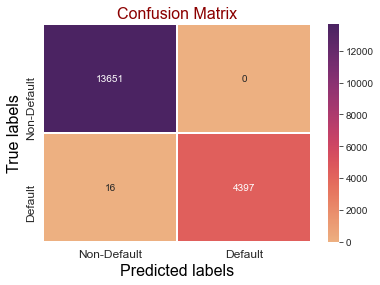

Confusion matrix values
 [[13651     0]
 [   16  4397]]


Classification Report
               precision    recall  f1-score   support

           0      0.999     1.000     0.999     13651
           1      1.000     0.996     0.998      4413

    accuracy                          0.999     18064
   macro avg      0.999     0.998     0.999     18064
weighted avg      0.999     0.999     0.999     18064



ROC_AUC score : 99.819%


In [136]:
# plotting confusion matrix,classification report and roc_auc score for train dataset

# confusion matrix
cm_train_joint_cat_tunned=metrics.confusion_matrix(joint_y_train,y_train_pred_joint_cat_tunned)

ax= plt.subplot()
sns.heatmap(cm_train_joint_cat_tunned, annot=True, fmt='g', ax=ax,cmap='flare',linewidth=0.5);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels',fontdict={'color': 'black','weight': 'normal','size': 16 })
ax.set_ylabel('True labels',fontdict={'color': 'black','weight': 'normal','size': 16 }) 
ax.set_title('Confusion Matrix',fontdict={'color': 'darkred','weight': 'normal','size': 16 }) 
ax.xaxis.set_ticklabels(['Non-Default', 'Default'])
ax.yaxis.set_ticklabels(['Non-Default','Default'])
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.show()

print('\033[1m'+"Confusion matrix values\n"+'\033[0m',cm_train_joint_cat_tunned)

# classification report
print('\033[1m'+"\n\nClassification Report\n"+'\033[0m',metrics.classification_report(joint_y_train,y_train_pred_joint_cat_tunned,digits=3))

# roc_auc score
auc_score=round(roc_auc_score(joint_y_train,y_train_pred_joint_cat_tunned)*100,3)
print('\033[1m'+"\n\nROC_AUC score : "+'\033[0m'+'{}%'.format(auc_score))

#### Evaluating the test dataset

In [137]:
# prediction for test dataset
y_test_pred_joint_cat_tunned=cat_clf_joint_tunned.predict(joint_X_test)

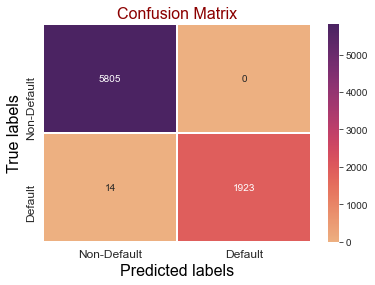

Confusion matrix values
 [[5805    0]
 [  14 1923]]


Classification Report
               precision    recall  f1-score   support

           0      0.998     1.000     0.999      5805
           1      1.000     0.993     0.996      1937

    accuracy                          0.998      7742
   macro avg      0.999     0.996     0.998      7742
weighted avg      0.998     0.998     0.998      7742



ROC_AUC score : 99.639%


In [138]:
# plotting confusion matrix,classification report and roc_auc score for train dataset

# confusion matrix
cm_test_joint_cat_tunned=metrics.confusion_matrix(joint_y_test,y_test_pred_joint_cat_tunned)

ax= plt.subplot()
sns.heatmap(cm_test_joint_cat_tunned, annot=True, fmt='g', ax=ax,cmap='flare',linewidth=0.5);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels',fontdict={'color': 'black','weight': 'normal','size': 16 })
ax.set_ylabel('True labels',fontdict={'color': 'black','weight': 'normal','size': 16 }) 
ax.set_title('Confusion Matrix',fontdict={'color': 'darkred','weight': 'normal','size': 16 }) 
ax.xaxis.set_ticklabels(['Non-Default', 'Default'])
ax.yaxis.set_ticklabels(['Non-Default','Default'])
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.show()

print('\033[1m'+"Confusion matrix values\n"+'\033[0m',cm_test_joint_cat_tunned)

# classification report
print('\033[1m'+"\n\nClassification Report\n"+'\033[0m',metrics.classification_report(joint_y_test,y_test_pred_joint_cat_tunned,digits=3))

# roc_auc score
auc_score=round(roc_auc_score(joint_y_test,y_test_pred_joint_cat_tunned)*100,3)
print('\033[1m'+"\n\nROC_AUC score : "+'\033[0m'+'{}%'.format(auc_score))

### Explainability of the result

In [83]:
# compiling the test dataset
start_time = timer(None) # timer starts

xpl_jnt_cat = SmartExplainer()
xpl_jnt_cat.compile(
    x=joint_X_test,
    model=cat_clf_joint,
   
)

timer(start_time)   # timer ends

Backend: Shap TreeExplainer

 Time taken: 0 hours 0 minutes and 2.06 seconds.


In [84]:
# converting the test prediction from array to series and reindexing the output result as per original indexing
y_test_pred_jnt_cat=pd.Series(y_pred_test_joint_cat)
y_test_pred_jnt_cat.index=joint_y_test.index
y_test_pred_jnt_cat.head()

6721     0
12582    0
19905    0
13375    0
1284     0
dtype: int64

In [85]:
# finidng the contribution of the features

start_time = timer(None) # start time

predictor_jnt_cat = xpl_jnt_cat.to_smartpredictor()
predictor_jnt_cat.add_input(x=joint_X_test, ypred=y_test_pred_jnt_cat)
detailed_contributions_jnt_cat = predictor_jnt_cat.detail_contributions()


timer(start_time)   # end time


 Time taken: 0 hours 0 minutes and 4.05 seconds.


In [86]:
# top 5 rows of the feature contribution of the prediction result
detailed_contributions_jnt_cat.head()

,ypred,proba,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,title,zip_code,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,annual_inc_joint,dti_joint,verification_status_joint,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,disbursement_method,debt_settlement_flag,avg_fico_range,avg_last_fico_range,sec_avg_last_fico_range
6721,0,0.999352,1.26582,0.006377,-0.004951,1.16561,-0.000083,0.00853,-0.018677,0.004338,-0.033679,-0.008446,-0.0,-0.009241,-0.000353,-0.000695,-0.614871,-0.004164,-0.004904,-0.03568,-0.001848,-0.008423,-0.00581,-0.00634,-0.101495,-0.001579,0.030034,-0.724297,0.087994,-0.440268,1.585478,-0.146478,0.011496,0.002937,-0.000298,-0.000367,0.004668,-0.004878,0.015486,0.194577,0.011937,0.005951,-0.004774,0.042394,0.035982,-0.017637,0.006141,0.003064,-0.001342,0.007461,0.009717,0.072468,-0.007455,0.004568,0.003262,-0.012777,0.065825,0.013018,-0.005801,-0.007313,-0.008093,-0.008029,0.020176,0.007257,-0.001502,0.004404,-0.014738,-0.002215,-0.008725,-0.0134,-0.009913,0.124542,0.013674,-0.042648,-0.008388,0.011054,0.001599,0.013834,-0.028108,0.038498,0.002633,-0.009961,0.000252,-0.003756,-0.004061,-0.00485,-0.00024,0.040896,-0.003753,0.68381,-0.009898
12582,0,0.999266,-0.396693,-0.000895,-0.018073,-0.306008,-0.002245,0.002419,0.01138,-0.016858,0.008233,0.003799,-0.0,-0.004032,-0.000239,-0.00195,0.023773,-0.006118,0.018183,0.002638,-0.002951,0.004798,-0.007196,0.001628,-0.01086,0.00045,0.189499,3.042316,-0.76243,-0.305706,1.369712,0.209226,-0.001872,0.000989,0.001147,-0.007323,-0.001765,0.010014,0.019011,0.013539,0.050675,0.001387,0.002699,-0.028182,0.000113,-0.008646,0.003635,-0.014215,-0.002201,0.005959,-0.001803,0.062653,-0.004029,0.013779,0.005008,-0.014287,-0.254735,-0.011391,-0.005565,-0.000604,0.004934,-0.015828,0.000223,0.016393,0.004325,-0.000062,-0.000838,0.000204,-0.007461,-0.004229,-0.00037,-0.00661,-0.017388,0.014856,-0.006728,0.01126,-0.001026,0.007001,-0.045127,-0.003357,-0.001304,-0.009969,-0.006126,-0.023763,-0.003735,-0.005611,-0.00027,0.03702,-0.003407,0.272938,0.000518
19905,0,0.999892,-0.739811,-0.001473,-0.011531,-0.683768,0.000534,0.006301,0.005672,-0.008204,-0.040868,-0.003524,-0.0,0.060927,0.003039,0.006752,0.026695,-0.00315,0.001586,0.030262,-0.001722,-0.034987,-0.001025,-0.022278,-0.017827,-0.001111,0.104747,3.442341,-0.024559,0.278225,1.253932,-0.101514,-0.01348,-0.003823,-0.012564,0.002018,0.002313,0.006441,0.00327,0.019617,0.070386,0.015899,0.000011,0.063492,0.060295,0.009277,-0.0027,-0.009274,-0.001155,-0.006209,0.001861,0.059285,-0.026323,-0.024536,-0.006296,0.000546,0.200343,0.0104,-0.001702,-0.013326,-0.007034,0.046853,-0.000687,-0.001117,-0.053021,-0.001637,-0.001041,-0.004748,-0.023828,0.005744,-0.013518,0.074055,-0.0074,-0.031863,0.001235,0.016265,-0.005402,-0.001775,0.106104,0.006815,0.001132,-0.004847,0.021321,-0.011808,0.01869,0.017513,0.000021,0.033908,0.00353,0.894692,-0.00117
13375,0,0.999844,-0.255639,-0.000895,-0.028142,0.148177,-0.001396,0.008401,0.009218,-0.015401,0.019777,-0.008512,-0.0,0.038496,0.00128,-0.00216,0.048241,

In [87]:
# top 5 feature contribution to the prediction result

start_time = timer(None) # start time

predictor_jnt_cat.modify_mask(max_contrib=5)
explanation_jnt_cat = predictor_jnt_cat.summarize()

timer(start_time)   # end time


 Time taken: 0 hours 0 minutes and 2.05 seconds.


In [88]:
# top 5 rows of the prediction result with top 5 contribution features
explanation_jnt_cat.head()

,ypred,proba,feature_1,value_1,contribution_1,feature_2,value_2,contribution_2,feature_3,value_3,contribution_3,feature_4,value_4,contribution_4,feature_5,value_5,contribution_5
6721,0,0.999352,last_pymnt_amnt,-0.512668,1.585478,loan_amnt,-1.151138,1.26582,installment,-0.988792,1.16561,total_rec_prncp,-0.687649,-0.724297,avg_last_fico_range,-0.003062,0.68381
12582,0,0.999266,total_rec_prncp,0.865899,3.042316,last_pymnt_amnt,0.503974,1.369712,total_rec_int,2.403174,-0.76243,loan_amnt,0.571947,-0.396693,installment,0.000792,-0.306008
19905,0,0.999892,total_rec_prncp,2.176909,3.442341,last_pymnt_amnt,2.79701,1.253932,avg_last_fico_range,0.461157,0.894692,loan_amnt,2.026027,-0.739811,installment,1.237289,-0.683768
13375,0,0.999844,total_rec_prncp,0.428895,2.737463,last_pymnt_amnt,0.126667,1.414682,avg_last_fico_range,0.39484,0.937438,last_pymnt_d,102018.0,-0.285824,mo_sin_old_rev_tl_op,1.668396,-0.278197
1284,0,0.999785,total_rec_prncp,-0.008108,1.987652,last_pymnt_amnt,0.196311,1.543476,avg_last_fico_range,0.262206,0.571101,last_credit_pull_d,112018.0,0.154334,installment,-0.212081,-0.143189


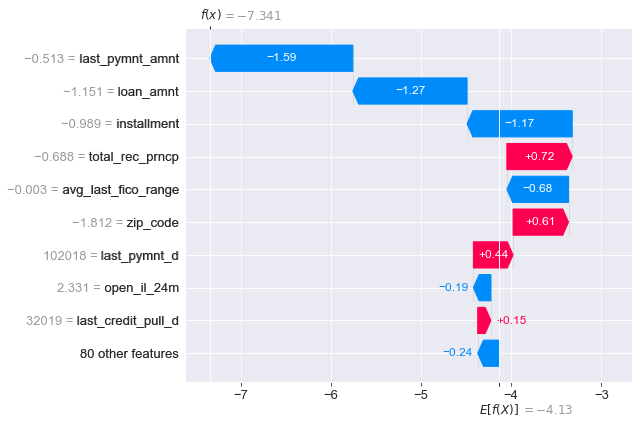


 Time taken: 0 hours 0 minutes and 2.69 seconds.


In [89]:
# plotting the first prediction's explanation using shap waterfall plot

start_time = timer(None) # timing starts from this point for "start_time" variable

explainer_jnt_cat = shap.Explainer(cat_clf_joint)
shap_values_jnt_cat = explainer_jnt_cat(joint_X_test)
shap.plots.waterfall(shap_values_jnt_cat[0])

timer(start_time)   # end time

In [90]:
# plotting the first prediction's explanation with a force plot
shap.initjs()
shap.plots.force(shap_values_jnt_cat[0])

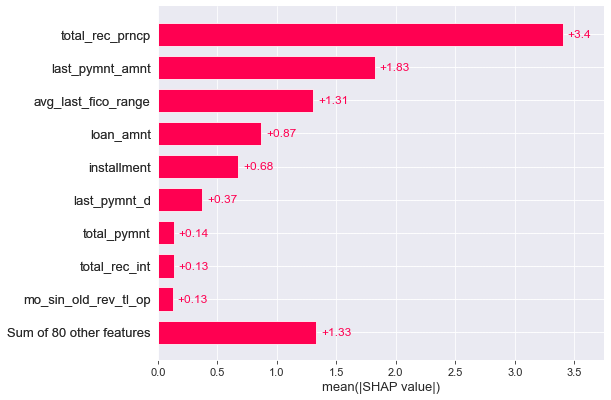

In [91]:
shap.plots.bar(shap_values_jnt_cat)

### Stacking Model

In [147]:
# initializing the classifier
clf1 = XGBClassifier(random_state=100)
clf2 = LGBMClassifier(random_state=100)
clf3 = CatBoostClassifier(random_state=100)
lr = LogisticRegression(random_state=100)
sclf_joint = StackingClassifier(classifiers=[clf1, clf2, clf3], 
                          meta_classifier=lr)

# fitting the model
sclf_joint.fit(joint_X_train,joint_y_train)

[06:42:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate set to 0.035448
0:	learn: 0.5968253	total: 13.4ms	remaining: 13.4s
1:	learn: 0.5225796	total: 26.3ms	remaining: 13.1s
2:	learn: 0.4514541	total: 39.3ms	remaining: 13.1s
3:	learn: 0.3877743	total: 51.9ms	remaining: 12.9s
4:	learn: 0.3386169	total: 64.2ms	remaining: 12.8s
5:	learn: 0.2938226	total: 76.5ms	remaining: 12.7s
6:	learn: 0.2673796	total: 88.1ms	remaining: 12.5s
7:	learn: 0.2338931	total: 100ms	remaining: 12.4s
8:	learn: 0.2157675	total: 111ms	remaining: 12.3s
9:	learn: 0.1895209	total: 124ms	remaining: 12.3s
10:	learn: 0.1784496	total: 135ms	remaining: 12.2s
11:	learn: 0.1682649	total: 147ms	remaining: 12.1s
12:	learn: 0.1457196	total: 160ms	remaining: 12.1s


165:	learn: 0.0070390	total: 1.99s	remaining: 9.98s
166:	learn: 0.0070223	total: 2s	remaining: 9.97s
167:	learn: 0.0069716	total: 2.01s	remaining: 9.95s
168:	learn: 0.0069533	total: 2.02s	remaining: 9.94s
169:	learn: 0.0069388	total: 2.03s	remaining: 9.92s
170:	learn: 0.0069293	total: 2.04s	remaining: 9.9s
171:	learn: 0.0069066	total: 2.06s	remaining: 9.89s
172:	learn: 0.0068753	total: 2.07s	remaining: 9.88s
173:	learn: 0.0068560	total: 2.08s	remaining: 9.87s
174:	learn: 0.0068449	total: 2.09s	remaining: 9.86s
175:	learn: 0.0068258	total: 2.1s	remaining: 9.84s
176:	learn: 0.0067758	total: 2.11s	remaining: 9.82s
177:	learn: 0.0067546	total: 2.12s	remaining: 9.81s
178:	learn: 0.0067382	total: 2.14s	remaining: 9.8s
179:	learn: 0.0067230	total: 2.15s	remaining: 9.78s
180:	learn: 0.0067133	total: 2.16s	remaining: 9.76s
181:	learn: 0.0066987	total: 2.17s	remaining: 9.75s
182:	learn: 0.0066759	total: 2.18s	remaining: 9.74s
183:	learn: 0.0066572	total: 2.19s	remaining: 9.73s
184:	learn: 0.0066

331:	learn: 0.0042965	total: 3.95s	remaining: 7.95s
332:	learn: 0.0042767	total: 3.96s	remaining: 7.94s
333:	learn: 0.0042719	total: 3.97s	remaining: 7.92s
334:	learn: 0.0042602	total: 3.98s	remaining: 7.91s
335:	learn: 0.0042554	total: 4s	remaining: 7.9s
336:	learn: 0.0042450	total: 4.01s	remaining: 7.89s
337:	learn: 0.0042260	total: 4.02s	remaining: 7.87s
338:	learn: 0.0042170	total: 4.03s	remaining: 7.86s
339:	learn: 0.0042132	total: 4.04s	remaining: 7.85s
340:	learn: 0.0041928	total: 4.06s	remaining: 7.84s
341:	learn: 0.0041870	total: 4.07s	remaining: 7.83s
342:	learn: 0.0041825	total: 4.08s	remaining: 7.81s
343:	learn: 0.0041756	total: 4.09s	remaining: 7.8s
344:	learn: 0.0041694	total: 4.1s	remaining: 7.79s
345:	learn: 0.0041583	total: 4.11s	remaining: 7.77s
346:	learn: 0.0041423	total: 4.13s	remaining: 7.76s
347:	learn: 0.0041248	total: 4.14s	remaining: 7.75s
348:	learn: 0.0041232	total: 4.15s	remaining: 7.74s
349:	learn: 0.0041120	total: 4.16s	remaining: 7.73s
350:	learn: 0.0041

501:	learn: 0.0026240	total: 5.91s	remaining: 5.86s
502:	learn: 0.0026211	total: 5.93s	remaining: 5.86s
503:	learn: 0.0026035	total: 5.94s	remaining: 5.85s
504:	learn: 0.0025744	total: 5.95s	remaining: 5.84s
505:	learn: 0.0025694	total: 5.97s	remaining: 5.82s
506:	learn: 0.0025645	total: 5.98s	remaining: 5.81s
507:	learn: 0.0025645	total: 5.99s	remaining: 5.8s
508:	learn: 0.0025576	total: 6s	remaining: 5.79s
509:	learn: 0.0025523	total: 6.01s	remaining: 5.78s
510:	learn: 0.0025492	total: 6.02s	remaining: 5.76s
511:	learn: 0.0025437	total: 6.03s	remaining: 5.75s
512:	learn: 0.0025275	total: 6.05s	remaining: 5.74s
513:	learn: 0.0025242	total: 6.05s	remaining: 5.72s
514:	learn: 0.0025204	total: 6.07s	remaining: 5.71s
515:	learn: 0.0025159	total: 6.08s	remaining: 5.7s
516:	learn: 0.0025154	total: 6.09s	remaining: 5.69s
517:	learn: 0.0025089	total: 6.1s	remaining: 5.67s
518:	learn: 0.0025063	total: 6.11s	remaining: 5.66s
519:	learn: 0.0024984	total: 6.12s	remaining: 5.65s
520:	learn: 0.0024

669:	learn: 0.0018788	total: 7.84s	remaining: 3.86s
670:	learn: 0.0018786	total: 7.85s	remaining: 3.85s
671:	learn: 0.0018754	total: 7.86s	remaining: 3.84s
672:	learn: 0.0018737	total: 7.87s	remaining: 3.83s
673:	learn: 0.0018699	total: 7.88s	remaining: 3.81s
674:	learn: 0.0018667	total: 7.9s	remaining: 3.8s
675:	learn: 0.0018603	total: 7.91s	remaining: 3.79s
676:	learn: 0.0018603	total: 7.92s	remaining: 3.78s
677:	learn: 0.0018602	total: 7.93s	remaining: 3.77s
678:	learn: 0.0018602	total: 7.94s	remaining: 3.75s
679:	learn: 0.0018575	total: 7.95s	remaining: 3.74s
680:	learn: 0.0018575	total: 7.96s	remaining: 3.73s
681:	learn: 0.0018575	total: 7.97s	remaining: 3.72s
682:	learn: 0.0018527	total: 7.98s	remaining: 3.71s
683:	learn: 0.0018491	total: 8s	remaining: 3.69s
684:	learn: 0.0018491	total: 8.01s	remaining: 3.68s
685:	learn: 0.0018491	total: 8.02s	remaining: 3.67s
686:	learn: 0.0018455	total: 8.03s	remaining: 3.66s
687:	learn: 0.0018455	total: 8.04s	remaining: 3.65s
688:	learn: 0.001

832:	learn: 0.0016388	total: 9.6s	remaining: 1.93s
833:	learn: 0.0016362	total: 9.61s	remaining: 1.91s
834:	learn: 0.0016362	total: 9.62s	remaining: 1.9s
835:	learn: 0.0016355	total: 9.63s	remaining: 1.89s
836:	learn: 0.0016355	total: 9.64s	remaining: 1.88s
837:	learn: 0.0016322	total: 9.66s	remaining: 1.87s
838:	learn: 0.0016322	total: 9.67s	remaining: 1.85s
839:	learn: 0.0016322	total: 9.68s	remaining: 1.84s
840:	learn: 0.0016322	total: 9.69s	remaining: 1.83s
841:	learn: 0.0016321	total: 9.7s	remaining: 1.82s
842:	learn: 0.0016321	total: 9.71s	remaining: 1.81s
843:	learn: 0.0016321	total: 9.72s	remaining: 1.8s
844:	learn: 0.0016321	total: 9.73s	remaining: 1.78s
845:	learn: 0.0016299	total: 9.74s	remaining: 1.77s
846:	learn: 0.0016299	total: 9.75s	remaining: 1.76s
847:	learn: 0.0016299	total: 9.76s	remaining: 1.75s
848:	learn: 0.0016299	total: 9.77s	remaining: 1.74s
849:	learn: 0.0016299	total: 9.78s	remaining: 1.73s
850:	learn: 0.0016198	total: 9.79s	remaining: 1.71s
851:	learn: 0.00

999:	learn: 0.0015609	total: 11.3s	remaining: 0us


StackingClassifier(classifiers=[XGBClassifier(base_score=None, booster=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              enable_categorical=False,
                                              gamma=None, gpu_id=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=None,
                                              max_delta_step=None,
                                              max_depth=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=N...
                                 

In [148]:
# prediction of train dataset
y_pred_train_jnt_stack=sclf_joint.predict(joint_X_train)

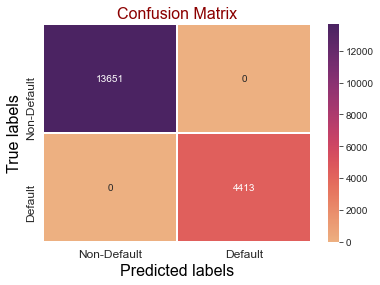

Confusion matrix values
 [[13651     0]
 [    0  4413]]


Classification Report
               precision    recall  f1-score   support

           0      1.000     1.000     1.000     13651
           1      1.000     1.000     1.000      4413

    accuracy                          1.000     18064
   macro avg      1.000     1.000     1.000     18064
weighted avg      1.000     1.000     1.000     18064



ROC_AUC score : 100.0%


In [149]:
# plotting confusion matrix,classification report and roc_auc score for train dataset

# confusion matrix
cm_train_jnt_stack=metrics.confusion_matrix(joint_y_train,y_pred_train_jnt_stack)

ax= plt.subplot()
sns.heatmap(cm_train_jnt_stack, annot=True, fmt='g', ax=ax,cmap='flare',linewidth=0.5);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels',fontdict={'color': 'black','weight': 'normal','size': 16 })
ax.set_ylabel('True labels',fontdict={'color': 'black','weight': 'normal','size': 16 }) 
ax.set_title('Confusion Matrix',fontdict={'color': 'darkred','weight': 'normal','size': 16 }) 
ax.xaxis.set_ticklabels(['Non-Default', 'Default'])
ax.yaxis.set_ticklabels(['Non-Default','Default'])
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.show()

print('\033[1m'+"Confusion matrix values\n"+'\033[0m',cm_train_jnt_stack)

# classification report
print('\033[1m'+"\n\nClassification Report\n"+'\033[0m',metrics.classification_report(joint_y_train,y_pred_train_jnt_stack,digits=3))

# roc_auc score
auc_score=round(roc_auc_score(joint_y_train,y_pred_train_jnt_stack)*100,3)
print('\033[1m'+"\n\nROC_AUC score : "+'\033[0m'+'{}%'.format(auc_score))

#### Evaluating the test dataset

In [150]:
# prediction for test dataset
y_pred_test_jnt_stack=sclf_joint.predict(joint_X_test)

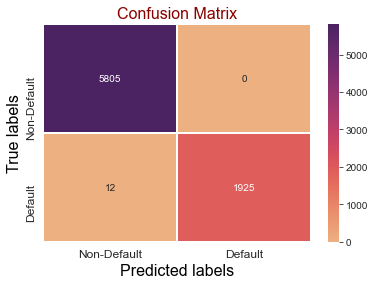

Confusion matrix values
 [[5805    0]
 [  12 1925]]


Classification Report
               precision    recall  f1-score   support

           0      0.998     1.000     0.999      5805
           1      1.000     0.994     0.997      1937

    accuracy                          0.998      7742
   macro avg      0.999     0.997     0.998      7742
weighted avg      0.998     0.998     0.998      7742



ROC_AUC score : 99.69%


In [151]:
# plotting confusion matrix,classification report and roc_auc score for train dataset

# confusion matrix
cm_test_jnt_stack=metrics.confusion_matrix(joint_y_test,y_pred_test_jnt_stack)

ax= plt.subplot()
sns.heatmap(cm_test_jnt_stack, annot=True, fmt='g', ax=ax,cmap='flare',linewidth=0.5);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels',fontdict={'color': 'black','weight': 'normal','size': 16 })
ax.set_ylabel('True labels',fontdict={'color': 'black','weight': 'normal','size': 16 }) 
ax.set_title('Confusion Matrix',fontdict={'color': 'darkred','weight': 'normal','size': 16 }) 
ax.xaxis.set_ticklabels(['Non-Default', 'Default'])
ax.yaxis.set_ticklabels(['Non-Default','Default'])
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.show()

print('\033[1m'+"Confusion matrix values\n"+'\033[0m',cm_test_jnt_stack)

# classification report
print('\033[1m'+"\n\nClassification Report\n"+'\033[0m',metrics.classification_report(joint_y_test,y_pred_test_jnt_stack,digits=3))

# roc_auc score
auc_score=round(roc_auc_score(joint_y_test,y_pred_test_jnt_stack)*100,3)
print('\033[1m'+"\n\nROC_AUC score : "+'\033[0m'+'{}%'.format(auc_score))

# Succuessful End of the process

In [152]:
timer(start_time_process)


 Time taken: 9 hours 24 minutes and 31.46 seconds.
